In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt
# import re

In [2]:
def check_missing_value (datatable):
    """функция для вывода пропущенных значений в датафрейме
    параметры: 
    datatable - датафрейм
    результат: выводит кол-во и долю пропущенных значений по столбцам датафрейма 
    """
    i = 0
    for col in datatable.columns:
        missing_values = datatable[col].isnull().sum()
        share_missing_values = datatable[col].isnull().mean()
        if missing_values > 0:
            print(f'{col}: {missing_values:.0f} ({share_missing_values*100:.0f}%)')
            i += 1
    print('Кол-во полей с пропусками значений:', i)
    return 

In [3]:
# Настройки отображения данных
pd.set_option('display.max.columns', None)
pd.set_option('display.float_format', '{:.2f}'.format) 

### Предварительный анализ, отбор и подготовка данных

In [4]:
# Загружаем исходные данные
df = pd.read_csv('export_dataframe.csv')

In [5]:
df.sample(5)

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
204072,MO,4947,Квартал героев,Центр-2 (корпуса 307-314),Железнодорожный (бывш. город),Носовихинское шоссе,Московская область,Балашиха городской округ,Главстрой Девелопмент,"1-комнатная квартира № 73, этаж №8, секция 1,...",24.80,1.00,ст,8,73,квартира,корпус 307,NaN,2002488.00,50:50:0020601:4894-50/215/2020-342,2020-10-30,на 240 мес. с даты фактического предоставления...,50:50:0020601:4894-50/215/2020-341,2020-10-30,СБЕРБАНК РОССИИ,240.00,ипотека,2871840.00,2020-10-01,0,1,10594.00,f,эконом (панель),4 кв 2021,верхние этажи,55.74,38.00,1,1,Есть,2020.60,Главстрой Девелопмент,NaN,8) МО ср.,1,верхние этажи,0.00,Нет,NaN,ЗФ,Оценка по номеру,29,2020-10-30,1,50:50:0020601:4894,0
215141,MO,1830,Пригород Лесное,NaN,Молоково (с.),Каширское шоссе,Московская область,Ленинский городской округ,Самолет,"2 - комнатная квартира, номер этажа: 9, секция...",55.50,2.00,2,9,360,квартира,корпус 11,NaN,1675720.00,50:21:0060103:498-50/001/2019-375,2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,4426271.00,2019-09-06,0,2,9483.00,m,эконом,2 кв 2021,идёт отделка,55.56,37.82,0,5,Есть,2019.20,Самолет,NaN,8) МО ср.,2,котлован,0.00,Нет,NaN,ЗФ,Оценка по номеру,24,2019-09-30,0,50:21:0060103:498,0
17129,SPB,3229,Невская звезда,NaN,муниципальный округ Обуховский,Невский район (СПб),Санкт-Петербург,Невский район (СПб),Строительный концерн ИПС,"Нежилое помещение (Автостоянка), номер этажа: ...",44.50,NaN,NaN,0,182,машино-место,корпус 4,NaN,903877.00,78:12:0714802:25-78/040/2019-6481,2019-11-25,NaN,NaN,NaN,NaN,NaN,NaN,2966660.00,2019-07-30,0,518,21118.00,m,эконом,2 кв 2021,идёт отделка,59.86,30.46,0,NaN,NaN,2018.20,Строительный концерн ИПС,NaN,2) СПБ - КАД,0,NaN,0.00,Нет,NaN,ЗФ,Оценка по среднему,118,2019-11-25,0,78:12:0714802:25,0
368902,SPB,3853,Чистый ручей,NaN,Сертолово (г.),Всеволожский район (ЛО),Ленинградская область,Всеволожский район (ЛО),Петрострой,"Квартира, в осях Гг-Иг/3г-5г, номер этажа: 7, ...",22.30,NaN,ст,7,267-Г,квартира,корпус 4,NaN,1815465.00,47:08:0103002:2537-47/012/2020-2703,2020-03-27,NaN,NaN,NaN,NaN,NaN,NaN,2279551.00,2020-03-19,1,1,21742.00,f,эконом,1 кв 2021,идёт отделка,60.14,30.23,0,NaN,NaN,2017.30,NaN,1010192.00,4) СПБ - ЛО,1,NaN,0.00,Нет,NaN,ФФ,Оценка по среднему,8,2020-03-27,0,47:08:0103002:2537,0
24354,M,4330,Нахимов,NaN,Черемушки,ЮЗАО,Москва,ЮЗАО,Флэт и Ко,"Машино-место № 159, этаж №-2, площадь:21.85 кв...",21.90,NaN,NaN,-2,159,машино-место,NaN,NaN,1974218.00,77:06:0004006:29-77/060/2020-277,2020-12-04,NaN,NaN,NaN,NaN,NaN,NaN,2290773.00,2020-08-31,0,2,NaN,f,комфорт,NaN,NaN,55.67,37.58,0,NaN,NaN,NaN,Флэт и Ко,NaN,3) от ~ТТК до МКАД,1,NaN,0.00,Нет,NaN,ЗФ,Оценка по среднему,95,2020-12-04,1,77:06:0004006:29,0


#### Общее представление о данных

In [6]:
df.info()
# Описание полей см. в Спецификация.xls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369845 entries, 0 to 369844
Data columns (total 57 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Файл                             369845 non-null  object 
 1   ID ЖК                            369845 non-null  object 
 2   ЖК рус                           369845 non-null  object 
 3   ЖК англ                          108574 non-null  object 
 4   Район Город                      369845 non-null  object 
 5   Округ Направление                369845 non-null  object 
 6   Регион                           369845 non-null  object 
 7   АТД                              369845 non-null  object 
 8   Застройщик ЖК                    369845 non-null  object 
 9   Описание помещения               369845 non-null  object 
 10  Площадь                          369839 non-null  float64
 11  Комнатность                      138678 non-null  float64
 12  Ти

In [7]:
# Изменим форматирование дат на datetime:
df_columns = ['Дата регистрации', 'Дата обременения', 'Дата ДДУ', 'Дата регистрации модель']
for col in df_columns:
    df[col] = pd.to_datetime(df[col])

In [8]:
# Распределение объектов недвижимости по регионам:
df['Регион'].value_counts()

Санкт-Петербург          108427
Московская область       100352
Москва                    98861
Новая Москва              34709
Ленинградская область     27496
Name: Регион, dtype: int64

In [9]:
# Распределение объектов недвижимости по типу помещения:
df['Тип помещения'].value_counts(dropna=False)

квартира             283869
машино-место          35735
кладовка              24355
апартамент            19380
нежилое помещение      6237
офис                    182
таунхаус                 48
коммерческое             22
NaN                      16
земельный участок         1
Name: Тип помещения, dtype: int64

In [10]:
# Распределение объектов недвижимости по классу:
df['класс'].value_counts(dropna=False)

комфорт            195205
эконом              59547
бизнес              55238
эконом (панель)     54776
премиум              4588
де-люкс               491
Name: класс, dtype: int64

In [11]:
# Распределение по стадии строительства в дату ДДУ:
# отсутствует 41% значений
df['Стадия строительства в дату ДДУ'].value_counts(dropna=False).to_frame('Кол-во').\
        join(df['Стадия строительства в дату ДДУ'].value_counts(dropna=False, normalize=True).to_frame('Доля'))

,Кол-во,Доля
NaN,150505,0.41
котлован,67215,0.18
идёт отделка,57285,0.15
верхние этажи,53108,0.14
нижние этажи,30124,0.08
сдан_ГК,9168,0.02
Документы,1513,0.00
Заморожен,927,0.00


In [12]:
# Распределение по стадии строительства (на текущий момент):
# отсутствует ок. 6% значений
df['Стадия строительства'].value_counts(dropna=False).to_frame('Кол-во').\
        join(df['Стадия строительства'].value_counts(dropna=False, normalize=True).to_frame('Доля'))

,Кол-во,Доля
идёт отделка,121900,0.33
сдан_ГК,119558,0.32
котлован,46578,0.13
верхние этажи,43482,0.12
NaN,21034,0.06
нижние этажи,13186,0.04
Документы,3403,0.01
Заморожен,704,0.00


In [13]:
# Распределение сделок по типу обременения:
df['Тип обременения'].value_counts(dropna=False).to_frame('Кол-во').\
    join(df['Тип обременения'].value_counts(dropna=False, normalize=True).to_frame('Доля'))

,Кол-во,Доля
NaN,209292,0.57
ипотека,154558,0.42
залог,4430,0.01
военная ипотека,1565,0.00


In [14]:
# Распределение сделок по типу покупателя:
# 0 - ФЛ,  1 - ЮЛ
df['is_buyer_ul'].value_counts()

0    320311
1     49534
Name: is_buyer_ul, dtype: int64

#### Восстановление отсутствующих значений для типа помещений

In [15]:
# Кол-во строк с отсутствующими значениями типа помещения
df[df['Тип помещения'].isnull()].shape[0] # 16 записей

16

In [16]:
df['Описание помещения']= df['Описание помещения'].str.lower()

In [17]:
# Объекты с неизвестным типом помещения.
# Как следует из поля Описания помещения, часть из них не является жилыми, исключим их:
with pd.option_context('display.max_colwidth', None):
    display(df.loc[(df['Тип помещения'].isnull()) & \
                   (~df['Описание помещения'].str.contains('фитнес')\
                   & ~df['Описание помещения'].str.contains('супермаркет')\
                   & ~df['Описание помещения'].str.contains('зона хранения')\
                   & ~df['Описание помещения'].str.contains('мастерская')\
                   & ~df['Описание помещения'].str.contains('mxmtc')\
                   & ~df['Описание помещения'].str.contains('нежелое')\
                   & ~df['Описание помещения'].str.contains('автотранспортных')                  
                   )][['ID ЖК', 'Корпус', 'Описание помещения', 'Площадь', 'Тип помещения']])

,ID ЖК,Корпус,Описание помещения,Площадь,Тип помещения
598,2214,корпус 4,список объектов долевого строительства. объектов в списке: 1,NaN,NaN
49621,4622,корпус 6,"московская область, ленинский муниципальный район, с/п булатниковское, пос. битца стр. 6 728 на 7. секция 6 этаже №7. секция 6, площадью 53.3 кв. м.",53.30,NaN
55168,3452,корпус 3.1,"5 лет с даты подписания акта приема-передачи № 54, этаж №4, площадь:32.57 кв. м, санкт-петербург, московский район, пулковское шоссе, дом 103, литера р, участок 62, жилой корпус, секция:, корпус: д.103,",32.60,NaN
149699,4622,NaN,1. срок передачи застройщиком объекта долевого строительства участнику долевого строительства - не позднее 31 марта 2020 года. 2. срок и порядок оплаты цены договора: оплата производится участником за счет собственных и кредитных средств. 3. гарантийный срок на объект долевого строительства - 5 лет. гарантийный срок на технологическое и инженерное оборудование - 3 года. 4. обеспечение прав участников долевого строительства подтверждается фактом оплаты застройщиком обязательных отчислений в компенсационный фонд.,NaN,NaN
176296,4289,корпус 1,"ленинградская область, всеволожский район, массив кудрово, уч.2 № 660, этаж №16, жс - мс / 27с - 29с, площадь:33.1 кв. м, ленинградская область, всеволожский район, массив кудрово, уч.2, корпус: корпус не указан,",33.10,NaN
200472,4591,корпус 3,"часть помещения № 36, этаж №7, площадь:49.5 кв. м, санкт-петербург, московский район, московское шоссе, д.3, лит.з, корпус: д.3,",49.50,NaN
314650,4509,корпус 4,"порт 6. к4-10.1 № не указан, этаж №1, площадь:41.8 кв. м, московская область, красногорский район, г. красногорск, мкр. опалиха (жк «серебрянка») корпус 4, корпус: , 4",41.80,NaN
343131,3464,корпус 3 (8-13),"санкт-петербург, приморский район, глухарская улица, уч.18, (северо-восточнее пересечения с планерной улицей), 3 этап строительства (секц. 8, 9, 10, 11, 12, 13) секция 11, в осях – 2/11-4/11; а/11-е/11 на 2 этаже №11/02/02, площадью 24.02 кв. м.",24.00,NaN
356956,2057,корпус 1,"аппртаменты № 96, этаж №10, площадь:37.73 кв. м, г.москва, ул.тайнинская, вл.9, корп.1, корпус: , корп.1",37.70,NaN


In [18]:
# Тип помещения для оставшихся "жилых" объектов можно восстановить по объектам с похожими параметрами в тех же ЖК, например:
df.loc[(df['ID ЖК'] == '4622') & (df['Корпус'] == 'корпус 6') & (df['Площадь'] == 53.3)] # 2-ух комн. квартиры

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
49621,MO,4622,Южная Битца,NaN,Дрожжино (п.г.т.),Симферопольское шоссе,Московская область,Ленинский городской округ,ФСК,"московская область, ленинский муниципальный ра...",53.30,NaN,NaN,7,NaN,NaN,корпус 6,NaN,2076419.00,50:21:0030210:9774-50/215/2020-488,2020-12-16,NaN,50:21:0030210:9774-50/215/2020-487,2020-12-16,СБЕРБАНК РОССИИ,NaN,ипотека,NaN,2020-12-08,0,1,10675.00,f,эконом (панель),2 кв 2022,нижние этажи,55.56,37.60,1,6,NaN,2020.90,ФСК,NaN,7) МО ближ.,0,нижние этажи,0.00,Нет,NaN,ЗФ,Без оценки,8,2020-12-16,1,50:21:0030210:9774,0
69124,MO,4622,Южная Битца,NaN,Дрожжино (п.г.т.),Симферопольское шоссе,Московская область,Ленинский городской округ,ФСК,"квартира № 716, этаж №4, секция 6, площадь:53....",53.30,NaN,2,4,716,квартира,корпус 6,NaN,2040333.00,50:21:0030210:9774-50/215/2020-316,2020-11-24,на 300 мес,50:21:0030210:9774-50/215/2020-315,2020-11-24,СБЕРБАНК РОССИИ,300.00,ипотека,7824440.00,2020-11-13,0,1,10675.00,f,эконом (панель),2 кв 2022,нижние этажи,55.56,37.60,1,6,Есть,2020.90,ФСК,NaN,7) МО ближ.,1,котлован,0.00,Нет,NaN,ЗФ,Оценка по номеру,11,2020-11-24,1,50:21:0030210:9774,0
237494,MO,4622,Южная Битца,NaN,Дрожжино (п.г.т.),Симферопольское шоссе,Московская область,Ленинский городской округ,ФСК,"квартира № 1067, этаж №6. секция 9, площадь:53...",53.30,NaN,2,6,1067,квартира,корпус 6,NaN,1260300.00,50:21:0030210:9774-50/215/2020-551,2020-12-23,242 (Двести сорок два) месяцев с даты фактичес...,50:21:0030210:9774-50/215/2020-550,2020-12-23,АЛЬФА-БАНК,242.00,ипотека,7888400.00,2020-12-15,0,1,10675.00,f,эконом (панель),2 кв 2022,нижние этажи,55.56,37.60,1,9,Есть,2020.90,ФСК,NaN,7) МО ближ.,1,нижние этажи,0.00,Нет,NaN,ЗФ,Оценка по номеру,8,2020-12-23,1,50:21:0030210:9774,0
283891,MO,4622,Южная Битца,NaN,Дрожжино (п.г.т.),Симферопольское шоссе,Московская область,Ленинский городской округ,ФСК,"московская область, ленинский муниципальный ра...",53.30,NaN,2,6,724,квартира,корпус 6,NaN,762164.00,50:21:0030210:9774-50/215/2020-330,2020-11-25,NaN,50:21:0030210:9774-50/215/2020-329,2020-11-25,СБЕРБАНК РОССИИ,NaN,ипотека,7861750.00,2020-11-16,0,1,10675.00,m,эконом (панель),2 кв 2022,нижние этажи,55.56,37.60,1,6,Есть,2020.90,ФСК,NaN,7) МО ближ.,1,котлован,0.00,Нет,NaN,ЗФ,Оценка по номеру,9,2020-11-25,1,50:21:0030210:9774,0
301836,MO,4622,Южная Битца,NaN,Дрожжино (п.г.т.),Симферопольское шоссе,Московская область,Ленинский городской округ,ФСК,"московская область, ленинский муниципальный ра...",53.30,NaN,2,8,1075,квартира,корпус 6,NaN,2076420.00,50:21:0030210:9774-50/215/2020-575,2020-12-24,на 252 месяца с даты фактического предоставлен...,50:21:0030210:9774-50/215/2020-574,2020-12-24,РОССЕЛЬХОЗБАНК,252.00,ипотека,7864415.00,2020-12-22,0,1,10675.00,f,эконом (панель),2 кв 2022,нижние этажи,55.56,37.60,1,9,Есть,2020.90,ФСК,NaN,7) МО ближ.,1,нижние этажи,0.00,Нет,NaN,ЗФ,Оценка по номеру,2,2020-12-24,1,50:21:0030210:9774,0
309332,MO,4622,Южная Битца,NaN,Дрожжино (п.г.т.),Симферопольское шоссе,Московская область,Ленинский городской округ,ФСК,"квартира № 736, этаж №9, секция 6, площадь:53....",53.30,NaN,2,9,736,квартира,корпус 6,NaN,2000134.00,50:21:0030210:9774-50/215/2020-85,2020-10-24,по истечении 240 (Двести сорок) месяцев,50:21:0030210:9774-50/215/2020-84,2020-10-24,СБЕРБАНК РОССИИ,240.00,ипотека,7824440.00,2020-10-05,0,1,10675.00,m,эконом (панель),2 кв 2022,

In [19]:
# Восстанавливаем и проверяем
df.loc[((df['Тип помещения'].isnull()) & (df['Площадь'] == 53.3)), 'Комнатность'] = 2
df.loc[((df['Тип помещения'].isnull()) & (df['Площадь'] == 53.3)), 'Тип помещения'] = 'квартира'
df.iloc[49621][11:16] # проверяем

Комнатность             2.0
Тип Комнатности         NaN
Этаж                      7
Номер                   NaN
Тип помещения      квартира
Name: 49621, dtype: object

In [20]:
df.loc[(df['ID ЖК'] == '3452') & (df['Корпус'] == 'корпус 3.1') & (df['Площадь'] == 32.6)] # студии

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
55168,SPB,3452,Зеленый квартал,Планетоград,муниципальный округ Пулковский меридиан,Московский район (СПб),Санкт-Петербург,Московский район (СПб),Setl Group,5 лет с даты подписания акта приема-передачи №...,32.60,5.00,NaN,4,54,NaN,корпус 3.1,"ООО ""Инвестиционная компания ""Сэтл""",NaN,78:14:0772303:3889-78/011/2021-140,2021-01-27,NaN,NaN,NaT,NaN,NaN,NaN,NaN,2020-12-28,0,364,22913.00,NaN,комфорт,2 кв 2022,котлован,59.76,30.32,0,NaN,NaN,2017.11,Setl Group,NaN,3) СПБ - КАД+,363,NaN,0.00,Нет,NaN,ЗЮ,Без оценки,30,2021-01-27,1,78:14:0772303:3889,1
102700,SPB,3452,Зеленый квартал,Планетоград,муниципальный округ Пулковский меридиан,Московский район (СПб),Санкт-Петербург,Московский район (СПб),Setl Group,"однокомнатная квартира, номер этажа: 2, номер ...",32.60,1.00,ст,2,211,квартира,корпус 3.1,NaN,858019.00,78:14:0772303:3889-78/034/2020-83,2020-03-31,NaN,NaN,NaT,NaN,NaN,NaN,3919596.00,2020-02-28,0,1,22913.00,f,комфорт,2 кв 2022,котлован,59.76,30.32,0,3,NaN,2017.11,Setl Group,NaN,3) СПБ - КАД+,1,NaN,0.00,Нет,NaN,ЗФ,Оценка по среднему,32,2020-03-31,0,78:14:0772303:3889,0


In [21]:
df.loc[((df['Тип помещения'].isnull()) & (df['Площадь'] == 32.6)), 'Комнатность'] = 1
df.loc[((df['Тип помещения'].isnull()) & (df['Площадь'] == 32.6)), 'Тип помещения'] = 'квартира'
# df.iloc[55168][11:16]

In [22]:
df.loc[(df['ID ЖК'] == '4289') & (df['Корпус'] == 'корпус 1') & (df['Площадь'] >= 33) & (df['Площадь'] <= 34)] # 1 комн. квартира

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
176296,SPB,4289,Геометрия Дыбенко,NaN,Кудрово (г.),Всеволожский район (ЛО),Ленинградская область,Всеволожский район (ЛО),Инвестторг,"ленинградская область, всеволожский район, мас...",33.10,NaN,NaN,16,660,NaN,корпус 1,NaN,2049194.00,47:07:1044001:593-66/199/2020-1165,2020-11-18,по истечении 180 (Сто восемьдесят) месяцев с д...,47:07:1044001:593-66/199/2020-1164,2020-11-18,СБЕРБАНК РОССИИ,180.00,ипотека,NaN,2020-09-30,0,1,22216.00,f,комфорт,4 кв 2021,идёт отделка,59.91,30.52,1,NaN,NaN,2019.20,Инвестторг,NaN,4) СПБ - ЛО,0,NaN,0.00,Нет,NaN,ЗФ,Без оценки,49,2020-11-18,1,47:07:1044001:593,0
342526,SPB,4289,Геометрия Дыбенко,NaN,Кудрово (г.),Всеволожский район (ЛО),Ленинградская область,Всеволожский район (ЛО),Инвестторг,"квартира, номер этажа: 11, номер объекта: 116,...",33.40,NaN,1,11,116,квартира,корпус 1,NaN,1263180.00,47:07:1044001:593-47/012/2020-1066,2020-09-18,362 месяца,47:07:1044001:593-47/012/2020-1067,2020-09-18,ВТБ,362.00,ипотека,3314516.00,2020-08-26,0,1,22216.00,m,комфорт,4 кв 2021,идёт отделка,59.91,30.52,1,NaN,NaN,2019.20,Инвестторг,NaN,4) СПБ - ЛО,1,NaN,0.00,Нет,NaN,ЗФ,Оценка по среднему,23,2020-09-18,0,47:07:1044001:593,0


In [23]:
df.loc[((df['Тип помещения'].isnull()) & (df['Площадь'] == 33.1)), 'Комнатность'] = 1
df.loc[((df['Тип помещения'].isnull()) & (df['Площадь'] == 33.1)), 'Тип помещения'] = 'квартира'
# df.iloc[176296][11:16]

In [24]:
df.loc[(df['ID ЖК'] == '3464') & (df['Корпус'] == 'корпус 3 (8-13)') & (df['Площадь'] == 24)] # студии

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
79076,SPB,3464,Полис на Комендантском,NaN,муниципальный округ Юнтолово,Приморский район (СПб),Санкт-Петербург,Приморский район (СПб),Полис ГК,"однокомнатная квартира, номер этажа: 20, номер...",24.00,1.00,ст,20,12/20/02,квартира,корпус 3 (8-13),NaN,1735489.00,78:34:0428601:1329-78/038/2019-8188,2019-10-26,с 26.10.2019 на 122 мес.,78:34:0428601:1329-78/038/2019-8189,2019-10-26,ВТБ,122.00,ипотека,2508888.00,2019-09-30,1,1,22132.00,f,комфорт,4 кв 2020,сдан_ГК,60.04,30.22,1,12,NaN,2019.20,"ООО Холдинговая компания ""Эра""",NaN,2) СПБ - КАД,1,NaN,0.00,Нет,NaN,ЮФ,Оценка по среднему,26,2019-10-26,0,78:34:0428601:1329,0
268825,SPB,3464,Полис на Комендантском,NaN,муниципальный округ Юнтолово,Приморский район (СПб),Санкт-Петербург,Приморский район (СПб),Полис ГК,"однокомнатная квартира, номер этажа: 13, номер...",24.00,1.00,ст,13,12/13/02,квартира,корпус 3 (8-13),NaN,1119792.00,78:34:0428601:1329-78/038/2020-10678,2020-06-16,возврата кредита: по истечении 240 месяцев с д...,78:34:0428601:1329-78/038/2020-10679,2020-06-16,ОТКРЫТИЕ,240.00,ипотека,2993880.00,2020-05-22,0,1,22132.00,m,комфорт,4 кв 2020,сдан_ГК,60.04,30.22,1,12,NaN,2019.20,Полис ГК,NaN,2) СПБ - КАД,1,NaN,0.00,Нет,NaN,ЗФ,Оценка по среднему,25,2020-06-16,0,78:34:0428601:1329,0
343131,SPB,3464,Полис на Комендантском,NaN,муниципальный округ Юнтолово,Приморский район (СПб),Санкт-Петербург,Приморский район (СПб),Полис ГК,"санкт-петербург, приморский район, глухарская ...",24.00,NaN,NaN,2,11/02/02,NaN,корпус 3 (8-13),NaN,2053610.00,78:34:0428601:1329-72/041/2020-2455,2020-11-18,240 месяцев с даты фактического предоставления...,78:34:0428601:1329-72/041/2020-2454,2020-11-18,СБЕРБАНК РОССИИ,240.00,ипотека,NaN,2020-10-01,0,1,22132.00,f,комфорт,4 кв 2020,сдан_ГК,60.04,30.22,1,11,NaN,2019.20,Полис ГК,NaN,2) СПБ - КАД,0,NaN,0.00,Нет,NaN,ЗФ,Без оценки,48,2020-11-18,1,78:34:0428601:1329,0


In [25]:
df.loc[((df['Тип помещения'].isnull()) & (df['Площадь'] == 24)), 'Комнатность'] = 1
df.loc[((df['Тип помещения'].isnull()) & (df['Площадь'] == 24)), 'Тип Комнатности'] = 'ст'
df.loc[((df['Тип помещения'].isnull()) & (df['Площадь'] == 24)), 'Тип помещения'] = 'квартира'
# df.iloc[343131][11:16]

In [26]:
df[df['Описание помещения'].str.contains('аппртаменты')]

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
356956,M,2057,Нормандия,NaN,Лосиноостровский,СВАО,Москва,СВАО,Эталон-инвест,"аппртаменты № 96, этаж №10, площадь:37.73 кв. ...",37.70,NaN,NaN,10,96,NaN,корпус 1,NaN,633820.00,77:02:0011002:29-77/060/2020-60,2020-08-28,NaN,NaN,NaT,NaN,NaN,NaN,NaN,2020-08-13,0,1,9365.00,f,комфорт,1 кв 2023,идёт отделка,55.88,37.68,0,NaN,NaN,2018.12,Эталон-инвест,NaN,3) от ~ТТК до МКАД,0,верхние этажи,0.00,Нет,NaN,ЗФ,Без оценки,15,2020-08-28,1,77:02:0011002:29,0


In [27]:
# Добавляем правильное значение Типа помещения для объекта с опечаткой в описании помещения:
filt = df['Описание помещения'].str.contains('аппртаменты')
df.loc[(filt), 'Тип помещения'] = 'апартамент'

#### Отбор в соответствии с условиями постановки задач

In [28]:
# Для дальнейшего анализа отберем объекты для проживания в многоэтажных домах (квартиры, апартаменты) за 2019-2020 г.г.
filt1 = (df['Дата регистрации'] >= '2019-01-01') & (df['Дата регистрации'] <= '2020-12-31')
filt2 = (df['Тип помещения'] == 'квартира') | (df['Тип помещения'] == 'апартамент')
res_ = df.loc[filt1 & filt2]
res_.head()

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
0,SPB,4603,Мурино парк,NaN,Мурино (г.),Всеволожский район (ЛО),Ленинградская область,Всеволожский район (ЛО),Запстрой,"квартира, номер этажа: 8,секция 5/3,оси 8с-9с,...",20.30,NaN,ст,8,527,квартира,корпус 1,NaN,1200620.00,47:07:0722001:22514-47/012/2019-332,2019-07-12,NaN,NaN,NaT,NaN,NaN,NaN,1567525.00,2019-07-01,1,1,22572.00,f,эконом,4 кв 2022,котлован,60.06,30.44,0,5/3,NaN,2019.30,NaN,857842.00,4) СПБ - ЛО,1,NaN,0.00,Нет,NaN,ФФ,Оценка по среднему,11,2019-07-12,0,47:07:0722001:22514,0
1,NM,4333,Румянцево Парк,NaN,Московский,НАО,Новая Москва,НАО,Lexion Development,"квартира, номер этажа: 10, секция 20, номер об...",84.80,NaN,3,10,1704,квартира,корпус 3,NaN,1812637.00,77:17:0000000:11676-77/017/2020-4137,2020-03-16,240 месяцев,77:17:0000000:11676-77/017/2020-4138,2020-03-16,РОССЕЛЬХОЗБАНК,240.00,ипотека,9445100.00,2020-02-12,0,1,9826.00,m,бизнес,1 кв 2023,верхние этажи,55.63,37.42,1,20,Нет,2019.90,Lexion Development,NaN,5) Н. Москва ближ.,1,нижние этажи,0.00,Нет,9067296.00,ЗФ,Оценка по номеру,33,2020-03-16,0,77:17:0000000:11676,0
2,MO,1957,Афродита-2,NaN,Пироговский (бывш. п.г.т.),Ярославское шоссе,Московская область,Мытищи городской округ,Березовец,"1 - комнатная квартира, номер этажа: 2 секция ...",26.50,1.00,ст,2,197,квартира,корпус 19,NaN,13916.00,50:12:0090234:32-50/001/2019-334,2019-10-09,NaN,NaN,NaT,NaN,NaN,NaN,1961795.00,2019-09-18,0,1,9737.00,m,комфорт,1 кв 2021,идёт отделка,55.97,37.74,0,3,Нет,2019.70,Березовец,NaN,8) МО ср.,1,нижние этажи,0.00,Нет,NaN,ЗФ,Оценка по среднему,21,2019-10-09,0,50:12:0090234:32,0
3,SPB,3469,Полюстрово Парк,NaN,муниципальный округ Пискаревка,Калининский район (СПб),Санкт-Петербург,Калининский район (СПб),Setl Group,"однокомнатная квартира, номер этажа: 13, номер...",35.60,1.00,1,13,1297,квартира,корпус 1,NaN,1505156.00,78:10:0005136:8383-78/037/2019-3275,2019-02-04,с 04.02.2019 по 22.01.2026,78:10:0005136:8383-78/037/2019-3276,2019-02-04,БАНК САНКТ-ПЕТЕРБУРГ,NaN,ипотека,4314150.00,2019-01-22,1,2,21355.00,f,эконом,4 кв 2018,сдан_ГК,59.98,30.39,1,5,NaN,2016.20,NaN,864819.00,2) СПБ - КАД,1,NaN,0.00,Нет,NaN,ФФ,Оценка по среднему,13,2019-02-04,0,78:10:0005136:8383,0
4,SPB,2491,Виктори Плаза,Victory Plaza,муниципальный округ Звездное,Московский район (СПб),Санкт-Петербург,Московский район (СПб),Setl Group,"четырехкомнатная квартира, номер этажа: 3, ном...",154.20,4.00,4,3,110,квартира,корпус 1,"ООО ""Сэтл Строй""",NaN,78:14:0765001:2-78/034/2019-233,2019-04-19,NaN,NaN,NaT,NaN,NaN,NaN,39135960.00,2019-04-01,1,35,20377.00,NaN,премиум,4 кв 2022,котлован,59.86,30.32,0,6,NaN,2019.20,NaN,820292.00,2) СПБ - КАД,35,NaN,33048000.00,Есть,NaN,ФЮ,Оценка по среднему,18,2019-04-19,0,78:14:0765001:2,1


In [29]:
# Размер получившегося массива:
res_.shape

(295020, 57)

In [30]:
# Добавим столбец с расчетным значением оценки цены 1 кв. метра площади:
res = res_.copy()
res.insert(28, 'Оценка цены 1 кв.м', res['Оценка цены'] / res['Площадь'], True)

#### Сводные статистические данные

In [31]:
# Основные статистические показатели по выборке данных:
res.describe()
# Средняя площадь проданного жилья: 47,1 кв.м
# Медианное значение площади: 40,6 кв.м (меньше среднего, что свидетельствует о положительной ассиметрии распределения)
# Не менее половины проданных объектов - однокомнатные
# Стоимость сделки: 
#     среднее: 6,79 млн. руб
#     медиана: 4,96 млн. руб
# Стоимость 1 кв.м: 
#     среднее: 135 тыс. руб
#     медиана: 118 млн. руб
# С привлечением ипотеки совершено не менее половины сделок

,Площадь,Комнатность,Этаж,Покупатель ФЛ,Длительность обременения,Оценка цены,Оценка цены 1 кв.м,Уступка,Купил лотов в ЖК,ID Корпус,lat,lng,Ипотека,Старт продаж К,Продавец ФЛ ID,Купил кв и ап в ЖК,Цена ДДУ,Цена со скидкой,Разница,version,is_buyer_ul
count,295018.00,134859.00,295020.00,263596.00,131562.00,293368.00,293367.00,295020.00,295020.00,288994.00,295020.00,295020.00,295020.00,287504.00,16465.00,295020.00,295020.00,10557.00,295020.00,295020.00,295020.00
mean,47.12,1.48,9.88,1393312.12,207.01,6788330.16,135502.80,0.21,74.80,14429.67,57.41,34.71,0.51,2018.86,1012835.89,54.25,1347466.47,7616036.12,22.74,0.26,0.11
std,23.58,0.70,15.34,623448.75,84.66,8292493.93,72380.89,0.41,313.03,6506.50,2.07,3.56,0.50,1.27,546162.16,240.78,4134239.88,4392574.66,69.70,0.44,0.31
min,2.70,1.00,-2.00,7.00,1.00,263295.00,28710.00,0.00,0.00,1491.00,54.83,29.51,0.00,2008.10,105.00,0.00,0.00,675300.00,-736.00,0.00,0.00
25%,32.80,1.00,5.00,944948.50,144.00,3407762.50,92674.00,0.00,1.00,9173.00,55.70,30.37,0.00,2018.20,668300.00,1.00,0.00,4598738.00,13.00,0.00,0.00
50%,40.60,1.00,8.00,1629544.00,220.00,4958748.00,117822.01,0.00,1.00,9893.00,55.87,37.38,1.00,2019.12,1052814.00,1.00,0.00,6720992.00,19.00,0.00,0.00
75%,58.40,2.00,14.00,1845971.75,242.00,7715984.25,156900.00,0.00,2.00,22389.00,59.90,37.64,1.00,2019.60,1457902.00,1.00,0.00,9269083.00,29.00,1.00,0.00
max,3135.30,8.00,4563.00,2119418.00,600.00,524018366.00,2044615.00,1.00,3778.00,23484.00,60.22,39.54,1.00,2021.10,1992725.00,2491.00,324145000.00,53496450.00,4303.00,1.00,1.00


In [32]:
res.describe(include = object)
# Кол-во жилых комплексов: 1024
# Кол-во застройщиков: 432
# Наиболее представленный регион объекта: Санкт-Петербург (или объединенный: Москва + Новая Москва)
# Жилой комплекс с наибольшими продажами: Чистое небо
# Лидер среди застройщиков по продажам (шт.): ПИК
# Больше всего объектов относится к классу комфорт: 157 388 (53%)
# Наиболее часто встречающийся залогодержатель: Сбербанк
# Чаще всего ДДУ заключался на стадии котлована
# Среди покупателей преобладают женщины

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Тип Комнатности,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Номер регистрации,Условия обременения,Номер обременения,Залогодержатель,Тип обременения,Пол,класс,Срок сдачи,Стадия строительства,Секция,Отделка,Продавец ЮЛ,Зона,Стадия строительства в дату ДДУ,Цена ДДУ Есть/Нет,Тип сделки,Тип оценки,участок
count,295020,295020,295020,82781,295020,295020,295020,295020,295020,295020,292069,294242,295020,288994,31232,294695,133576,153115,152452,152452,263588,295020,288994,288994,177738,174009,267336,295020,173983,295020,295020,295020,295020
unique,4,1024,1024,334,303,51,5,76,432,289641,5,40000,2,976,1324,269937,36331,148332,415,3,2,6,51,7,3452,3,1647,13,7,2,15,4,1756
top,SPB,3843,Чистое небо,Планетоград,муниципальный округ Коломяги,НАО,Санкт-Петербург,НАО,ПИК,"квартира, номер этажа: 2, номер объекта: 51, п...",1,3,квартира,корпус 1,"АО ""АВГУР ЭСТЕЙТ""",78:12:0006305:17-78/040/2020-173,240 месяцев,78:42:0015106:11649-78/006/2019-253,СБЕРБАНК РОССИИ,ипотека,f,комфорт,4 кв 2021,идёт отделка,1,Нет,ПИК,2) СПБ - КАД,котлован,Нет,ЗФ,Оценка по среднему,50:21:0120316:125
freq,117357,7510,7510,2105,12929,25925,92271,25925,27623,4,108551,1066,276140,51328,1383,587,3430,503,54246,147479,144065,157388,41411,101150,43857,74346,26281,69992,53004,228617,215206,194097,2382


In [33]:
res[df_columns].describe(datetime_is_numeric=True)

,Дата регистрации,Дата обременения,Дата ДДУ,Дата регистрации модель
count,295020,130315,295020,295020
mean,2020-01-01 19:41:54.655277824,2020-02-04 09:58:27.234009856,2019-12-10 01:55:30.860280832,2020-01-03 13:20:03.514338048
min,2019-01-09 00:00:00,2015-07-16 00:00:00,2008-01-12 00:00:00,2010-07-24 00:00:00
25%,2019-06-20 00:00:00,2019-08-01 00:00:00,2019-05-31 00:00:00,2019-06-20 00:00:00
50%,2019-12-19 00:00:00,2020-02-13 00:00:00,2019-12-02 00:00:00,2019-12-20 00:00:00
75%,2020-07-24 00:00:00,2020-08-27 00:00:00,2020-07-07 00:00:00,2020-07-29 00:00:00
max,2020-12-31 00:00:00,2021-01-30 00:00:00,2021-01-28 00:00:00,2021-02-05 00:00:00


In [34]:
# Общее кол-во и доля пропущенных значений по столбцам:
# В 28 столбцах есть пропуски значений
check_missing_value(res)

ЖК англ: 212239 (72%)
Площадь: 2 (0%)
Комнатность: 160161 (54%)
Тип Комнатности: 2951 (1%)
Номер: 778 (0%)
Корпус: 6026 (2%)
Покупатель ЮЛ: 263788 (89%)
Покупатель ФЛ: 31424 (11%)
Номер регистрации: 325 (0%)
Условия обременения: 161444 (55%)
Номер обременения: 141905 (48%)
Дата обременения: 164705 (56%)
Залогодержатель: 142568 (48%)
Длительность обременения: 163458 (55%)
Тип обременения: 142568 (48%)
Оценка цены: 1652 (1%)
Оценка цены 1 кв.м: 1653 (1%)
ID Корпус: 6026 (2%)
Пол: 31432 (11%)
Срок сдачи: 6026 (2%)
Стадия строительства: 6026 (2%)
Секция: 117282 (40%)
Отделка: 121011 (41%)
Старт продаж К: 7516 (3%)
Продавец ЮЛ: 27684 (9%)
Продавец ФЛ ID: 278555 (94%)
Стадия строительства в дату ДДУ: 121037 (41%)
Цена со скидкой: 284463 (96%)
Кол-во полей с пропусками значений: 28


In [35]:
# Дубли записей отсутствуют:
res.duplicated().sum()

0

#### Анализ и восстановление отсутствующих значений по значимым полям

#### Площадь

In [36]:
# Объекты с неизвестной площадью:
with pd.option_context('display.max_colwidth', None):
    display(res[res['Площадь'].isnull()])
# Обнаружилась строка с несколькими ID ЖК

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Оценка цены 1 кв.м,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
81285,SPB,"2498,2499,3246","Йога,Йога-2,Новая Каменка","Yoga,Yoga-2,На Королева",муниципальный округ Коломяги,Приморский район (СПб),Санкт-Петербург,Приморский район (СПб),Лидер Групп,"однокомнатная квартира № 24.5, этаж №6, площадь:не указана кв. м, г.санкт-петербург, приморский район, пригородный, уч.197, (каменка), корпус: корпус не указан,",NaN,1.00,1,6,24.5,квартира,NaN,NaN,2053368.00,78:34:0004281:92-78/011/2020-1359,2020-11-20,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2020-10-19,1,1,NaN,m,эконом (панель),NaN,NaN,60.03,30.23,0,NaN,NaN,NaN,NaN,NaN,2) СПБ - КАД,1,NaN,0.00,Нет,NaN,НФ,Без оценки,32,2020-11-20,1,78:34:0004281:92,0
321673,MO,1134,Изумрудные холмы,NaN,Красногорск (г.),Волоколамское шоссе,Московская область,Красногорск городской округ,Эталон-инвест,"2 - комнатная квартира, номер этажа: 5, секция 17.1, номер объекта: 56, местоположение: московская область, красногорский район, вблизи г. красногорска, корп. 17",NaN,2.00,2,5,56,квартира,корпус 17,NaN,1515450.00,50:11:0010104:590-50/001/2019-827,2019-02-28,NaN,NaN,NaT,NaN,NaN,NaN,4563000.00,NaN,2019-02-11,0,1,7821.00,m,эконом,2 кв 2019,сдан_ГК,55.84,37.28,0,17.1,Неизвестно,2017.20,Эталон-инвест,NaN,7) МО ближ.,1,верхние этажи,4563000.00,Есть,NaN,ЗФ,Оценка по ДДУ,17,2019-02-28,0,50:11:0010104:590,0


In [37]:
# 896 строк содержат несколько ID ЖК в одной строке:
res[res['ID ЖК'].str.contains(',')]['ID ЖК'].value_counts()

2498,2499,3246    851
4447,4578          45
Name: ID ЖК, dtype: int64

In [38]:
# ЖК с такими ID встречаются и в др. строках
res[res['ID ЖК'].isin(['2498','2499','3246','4447','4578'])].head()

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Оценка цены 1 кв.м,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
12511,MO,4447,Донской (Коломна),NaN,Коломна (г.),Новорязанское шоссе,Московская область,Коломна городской округ,РК-Газсетьсервис Коломна,"3 - комнатная квартира, номер этажа: 3, номер ...",96.90,NaN,3,3,9,квартира,корпус 8,NaN,1846032.00,50:57:0080704:14-50/001/2019-15,2019-09-20,NaN,NaN,NaT,NaN,NaN,NaN,4279782.00,44167.00,2019-08-30,0,1,10364.00,f,эконом,3 кв 2021,Документы,55.06,38.74,0,NaN,Неизвестно,NaN,РК-Газсетьсервис Коломна,NaN,9) МО дальн.,1,котлован,0.00,Нет,NaN,ЗФ,Оценка по среднему,21,2019-09-20,0,50:57:0080704:14,0
24596,MO,4447,Донской (Коломна),NaN,Коломна (г.),Новорязанское шоссе,Московская область,Коломна городской округ,РК-Газсетьсервис Коломна,"3 комнатная квартира, номер этажа: 7, номер об...",96.90,3.00,3,7,41,квартира,корпус 8,NaN,1846036.00,50:57:0080704:14-50/014/2019-32,2019-10-22,на 144 месяца с даты фактического предоставлен...,50:57:0080704:14-50/014/2019-33,2019-10-22,СБЕРБАНК РОССИИ,144.00,ипотека,4279782.00,44167.00,2019-08-21,0,1,10364.00,f,эконом,3 кв 2021,Документы,55.06,38.74,1,NaN,Неизвестно,NaN,РК-Газсетьсервис Коломна,NaN,9) МО дальн.,1,котлован,0.00,Нет,NaN,ЗФ,Оценка по среднему,62,2019-10-22,0,50:57:0080704:14,0
29064,MO,4447,Донской (Коломна),NaN,Коломна (г.),Новорязанское шоссе,Московская область,Коломна городской округ,РК-Газсетьсервис Коломна,"двухкомнатная квартира, номер этажа: 3, номер ...",73.60,2.00,2,3,14,квартира,корпус 8,NaN,1058868.00,50:57:0080704:14-50/001/2019-48,2019-11-05,NaN,NaN,NaT,NaN,NaN,NaN,3974400.00,54000.00,2019-10-16,0,1,10364.00,f,эконом,3 кв 2021,Документы,55.06,38.74,0,NaN,Неизвестно,NaN,РК-Газсетьсервис Коломна,NaN,9) МО дальн.,1,котлован,0.00,Нет,NaN,ЗФ,Оценка по среднему,20,2019-11-05,0,50:57:0080704:14,0
31146,MO,4447,Донской (Коломна),NaN,Коломна (г.),Новорязанское шоссе,Московская область,Коломна городской округ,РК-Газсетьсервис Коломна,"1 - комнатная квартира, номер этажа: 6, номер ...",51.40,NaN,1,6,36,квартира,корпус 8,NaN,1845795.00,50:57:0080704:14-50/001/2019-45,2019-10-25,NaN,NaN,NaT,NaN,NaN,NaN,2775600.00,54000.00,2019-09-13,0,1,10364.00,m,эконом,3 кв 2021,Документы,55.06,38.74,0,NaN,Неизвестно,NaN,РК-Газсетьсервис Коломна,NaN,9) МО дальн.,1,котлован,0.00,Нет,NaN,ЗФ,Оценка по среднему,42,2019-10-25,0,50:57:0080704:14,0
44242,MO,4447,Донской (Коломна),NaN,Коломна (г.),Новорязанское шоссе,Московская область,Коломна городской округ,РК-Газсетьсервис Коломна,"3 - комнатная квартира, номер этажа: 8, номер ...",97.00,NaN,3,8,56,квартира,корпус 8,NaN,1846029.00,50:57:0080704:14-50/001/2020-138,2020-04-03,с 03.04.2020 на 182 месяца,50:57:0080704:14-50/001/2020-139,2020-04-03,ВТБ,182.00,ипотека,5082703.00,52399.00,2020-03-18,0,1,10364.00,m,эконом,3 кв 2021,Документы,55.06,38.74,1,NaN,Неизвестно,NaN,РК-Газсетьсервис Коломна,NaN,9) МО дальн.,1,Документы,0.00,Нет,NaN,ЗФ,Оценка по среднему,16,2020-04-03,0,50:57:0080704:14,0


In [39]:
# Удалим строки, содержащие несколько ID в поле ID ЖК:
res = res.drop(res[res['ID ЖК'].str.contains(',')].index)

In [40]:
# Для оставшегося объекта с неизвестной площадью считаем ср. площадь по квартирам в том же корпусе и с тем же кол-вом комнат:
area = res.loc[(res['ID ЖК'] == '1134') & (res['Корпус'] == 'корпус 17') & (res['Комнатность'] == 2)]['Площадь'].mean()
area

55.375

In [41]:
# Заменим отсутствующее значение полученным:
res.loc[(res['Площадь'].isnull()), 'Площадь'] = area

<AxesSubplot:xlabel='Площадь'>

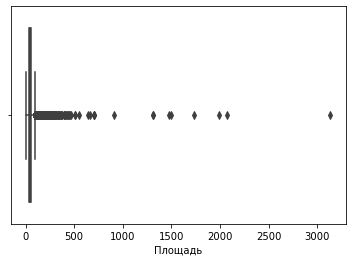

In [42]:
sns.boxplot(x=res['Площадь'])
# Ниже исследуем полученное распределение 

#### Кол-во комнат (комнатность, тип комнатности)

In [43]:
# Комнатность - это кол-во комнат, как указано в описании помещения в выписке ЕГРП/ЕГРН (если есть) 
# Тип Комнатности - комнатность, определенная по алгоритму (не во всех случаях) - студия, 1-комн. кв. и т.д.
# Объекты с неизвестным кол-вом комнат (2951 (1%)):
res[res['Тип Комнатности'].isnull()].head(5)

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Оценка цены 1 кв.м,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
99,M,4653,Сказочный лес,NaN,Ярославский,СВАО,Москва,СВАО,Seven Suns Development,"квартира, номер этажа: 10, номер объекта: 162,...",82.80,NaN,NaN,10,162,квартира,корпус 3,"""СЕВЕН САНС ДЕВЕЛОПМЕНТ МСК ЮГО-ЗАПАД""",NaN,77:02:0016003:23-77/009/2020-2295,2020-03-04,NaN,NaN,NaT,NaN,NaN,NaN,9775285.00,118059.00,2019-06-17,0,1185,9802.00,NaN,комфорт,2 кв 2021,верхние этажи,55.85,37.71,0,NaN,Нет,2019.90,Seven Suns Development,NaN,3) от ~ТТК до МКАД,1183,котлован,0.00,Нет,NaN,ЗЮ,Оценка по среднему,261,2020-03-04,0,77:02:0016003:23,1
154,M,1920,Нева Тауерс,Neva Towers,Пресненский,ЦАО,Москва,ЦАО,Renaissance Construction,"нежилое помещение (апартамент), номер этажа: 4...",67.10,NaN,NaN,40,1064,апартамент,корпус 1,NaN,436071.00,77:01:0004042:71-77/017/2020-2762,2020-06-17,NaN,NaN,NaT,NaN,NaN,NaN,32204377.00,479946.01,2020-05-28,0,1,7376.00,m,премиум,4 кв 2020,сдан_ГК,55.75,37.53,0,NaN,Есть,2018.20,Renaissance Construction,NaN,2) от СК до ~ТТК,1,сдан_ГК,0.00,Нет,NaN,ЗФ,Оценка по среднему,20,2020-06-17,0,77:01:0004042:71,0
442,M,4653,Сказочный лес,NaN,Ярославский,СВАО,Москва,СВАО,Seven Suns Development,"квартира, номер этажа: 7, секция 1, номер объе...",84.00,NaN,NaN,7,44,квартира,корпус 3,"""СЕВЕН САНС ДЕВЕЛОПМЕНТ МСК ЮГО-ЗАПАД""",NaN,77:02:0016003:23-77/007/2019-661,2019-06-27,NaN,NaN,NaT,NaN,NaN,NaN,9916956.00,118059.00,2019-06-17,0,1185,9802.00,NaN,комфорт,2 кв 2021,верхние этажи,55.85,37.71,0,1,Нет,2019.90,Seven Suns Development,NaN,3) от ~ТТК до МКАД,1183,котлован,9576000.00,Есть,NaN,ЗЮ,Оценка по среднему,10,2019-06-27,0,77:02:0016003:23,1
456,M,1920,Нева Тауерс,Neva Towers,Пресненский,ЦАО,Москва,ЦАО,Renaissance Construction,апартамент (нежилое помещение гостиничного тип...,113.10,NaN,NaN,57,662,апартамент,корпус 2,NaN,7589.00,77:01:0004042:71-77/005/2019-1451,2019-02-28,по 13.02.2029,77:01:0004042:71-77/005/2019-1452,2019-02-28,СОВКОМБАНК,120.00,ипотека,61550264.00,544211.00,2019-02-13,0,2,7479.00,m,премиум,4 кв 2020,сдан_ГК,55.75,37.53,1,NaN,Есть,2016.70,Renaissance Construction,NaN,2) от СК до ~ТТК,1,верхние этажи,0.00,Нет,NaN,ЗФ,Оценка по среднему,15,2019-02-28,0,77:01:0004042:71,0
511,M,640,Садовые кварталы,NaN,Хамовники,ЦАО,Москва,ЦАО,Интеко,"квартира, номер этажа: 2, номер объекта: 37л, ...",63.10,NaN,NaN,2,37Л,квартира,корпус 2.6,NaN,1424655.00,77:01:0005010:3096-77/011/2020-1228,2020-02-13,NaN,NaN,NaT,NaN,NaN,NaN,37635995.00,596450.00,2020-01-29,0,3,7903.00,f,премиум,3 кв 2021,верхние этажи,55.73,37.57,0,NaN,Нет,2017.20,Интеко,NaN,2) от СК до ~ТТК,2,верхние этажи,0.00,Нет,NaN,ЗФ,Оценка по среднему,15,2020-02-13,0,77:01:0005010:1003,0


In [44]:
# 1045 строк с объектами, для которых отсутствует значение Тип комнатности, но есть значение в поле Комнатность:
res[res['Тип Комнатности'].isnull()]['Комнатность'].value_counts()

1.00    985
2.00     48
3.00     12
Name: Комнатность, dtype: int64

In [45]:
# Примеры таких строк:
res.loc[res['Тип Комнатности'].isnull() & res['Комнатность'].notnull()].head()

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Оценка цены 1 кв.м,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
573,M,731,Сердце Столицы,NaN,Хорошево-Мневники,СЗАО,Москва,СЗАО,Донстрой,"1-комнатная квартира, номер этажа: 13, номер о...",77.60,1.00,NaN,13,17.03.01.123,квартира,корпус ЖД-8,NaN,1811802.00,77:08:0012005:7394-77/007/2020-716,2020-03-27,NaN,NaN,NaT,NaN,NaN,NaN,17973681.00,231619.60,2020-03-17,0,1,10408.00,f,бизнес,4 кв 2023,котлован,55.76,37.51,0,NaN,Нет,2020.20,Донстрой,NaN,3) от ~ТТК до МКАД,1,котлован,0.00,Нет,NaN,ЗФ,Оценка по номеру,10,2020-03-27,0,77:08:0012005:7394,0
1217,SPB,4321,Светлый мир Тихая гавань,NaN,муниципальный округ округ Морской,Василеостровский район (СПб),Санкт-Петербург,Василеостровский район (СПб),Seven Suns Development,"однокомнатная квартира, номер этажа: 7, номер ...",67.90,1.00,NaN,7,477,квартира,корпус 1,NaN,1939217.00,78:43:0000000:6-78/033/2019-2813,2019-11-15,NaN,NaN,NaT,NaN,NaN,NaN,8892320.00,130962.00,2019-10-02,1,1,22267.00,f,комфорт,4 кв 2020,сдан_ГК,59.94,30.20,0,5,NaN,2019.20,"ООО ""Севен Санс Девелопмент СПб Северо-Запад""",NaN,1) СПБ - центр,1,NaN,0.00,Нет,NaN,ЮФ,Оценка по среднему,44,2019-11-15,0,78:43:0000000:6,0
1629,M,4301,Фридом,Freedom,Хорошево-Мневники,СЗАО,Москва,СЗАО,Донстрой,"1-комнатная квартира, номер этажа: 31, номер о...",77.40,1.00,NaN,31,28.01.02.391,квартира,корпус 2,NaN,33305.00,77:08:0012003:21-77/007/2020-1770,2020-03-10,по 01.02.2045,77:08:0012003:21-77/007/2020-1771,NaT,ГАЗПРОМБАНК,299.00,ипотека,17591472.00,227280.00,2020-02-21,0,1,9302.00,f,бизнес,2 кв 2022,верхние этажи,55.77,37.50,1,NaN,Неизвестно,2018.11,Донстрой,NaN,3) от ~ТТК до МКАД,1,котлован,0.00,Нет,16711898.00,ЗФ,Оценка по номеру,18,2020-03-10,0,77:08:0012003:21,0
1647,M,4307,Крылья,Лобачевского 120,Раменки,ЗАО,Москва,ЗАО,Эталон (проекты Лидер Инвест),"1-комнатная квартира, номер этажа: 8, номер об...",63.30,1.00,NaN,8,143,квартира,корпус 2,NaN,1713162.00,77:07:0013002:4049-77/011/2019-953,2019-10-02,144 месяца,77:07:0013002:4049-77/011/2019-954,NaT,АБСОЛЮТ БАНК,144.00,ипотека,13321959.00,210457.49,2019-09-17,0,1,9535.00,f,бизнес,4 кв 2021,идёт отделка,55.70,37.47,1,NaN,Нет,2019.30,Эталон (проекты Лидер Инвест),NaN,3) от ~ТТК до МКАД,1,нижние этажи,0.00,Нет,NaN,ЗФ,Оценка по номеру,15,2019-10-02,0,77:07:0013002:4049,0
1823,SPB,4321,Светлый мир Тихая гавань,NaN,муниципальный округ округ Морской,Василеостровский район (СПб),Санкт-Петербург,Василеостровский район (СПб),Seven Suns Development,"однокомнатная квартира, номер этажа: 16, номер...",67.90,1.00,NaN,16,540,квартира,корпус 1,NaN,1731493.00,78:43:0000000:6-78/033/2019-2668,2019-10-09,с 09.10.2019 на 240 месяцев,78:43:0000000:6-78/033/2019-2669,2019-10-09,СБЕРБАНК РОССИИ,240.00,ипотека,8338595.00,122807.00,2019-09-28,1,1,22267.00,m,комфорт,4 кв 2020,сдан_ГК,59.94,30.20,1,5,NaN,2019.20,"ООО ""Севен Санс Девелопмент СПб Северо-Запад""",NaN,1) СПБ - центр,1,NaN,0.00,Нет,NaN,ЮФ,Оценка по среднему,11,2019-10-09,0,78:43:0000000:6,0


In [46]:
# Добавим столбец 'Кол-во комнат', в котором будут полные данные о кол-ве комнат:
res.insert(13, 'Кол-во комнат', res['Тип Комнатности'], True)

In [47]:
# Заменим в нем отсутствующие значения теми, что есть в поле Комнатность (1045 строк):
res.loc[(res['Тип Комнатности'].isnull() & res['Комнатность'].notnull()), 'Кол-во комнат'] = res['Комнатность']

In [48]:
# Приведем данные в столбце Кол-во комнат к одному типу:
res['Кол-во комнат'] = res['Кол-во комнат'].replace('ст', '0')
res['Кол-во комнат'] = res['Кол-во комнат'].astype('float64')

In [49]:
# Остаются неизвестными по кол-ву комнат 1906 объектов:
res['Кол-во комнат'].value_counts(dropna=False)

1.00    109274
2.00     81476
0.00     66095
3.00     31531
4.00      3842
NaN       1906
Name: Кол-во комнат, dtype: int64

In [50]:
# Распределение этих объектов по площади:
res[res['Кол-во комнат'].isnull()]['Площадь'].describe()

count   1906.00
mean      76.85
std       23.84
min        2.70
25%       64.00
50%       68.60
75%       79.50
max      290.70
Name: Площадь, dtype: float64

In [51]:
# Объекты с "подозрительно" малой площадью:
res.query('Площадь <= 10') 

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Кол-во комнат,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Оценка цены 1 кв.м,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
33894,MO,4399,Тургенева 9 (Пушкино),Тургенева очередь 3,Пушкино (г.),Ярославское шоссе,Московская область,Пушкино городской округ,Профи Инвест,"московская область, г. пушкино, пр.1-й некрасо...",2.70,NaN,NaN,NaN,12,К129,квартира,корпус А,NaN,1971921.00,50:13:0070201:3489-50/215/2020-964,2020-10-22,NaN,NaN,NaT,NaN,NaN,NaN,263295.00,97516.67,2020-02-28,0,6,8751.00,f,эконом,4 кв 2020,сдан_ГК,56.01,37.85,0,NaN,Нет,2018.60,Профи Инвест,NaN,8) МО ср.,4,верхние этажи,0.00,Нет,NaN,ЗФ,Оценка по среднему,237,2020-03-13,1,50:13:0070201:3489,0


In [52]:
# Как следует из Описания помещения, в данных - ошибка:
res['Описание помещения'][33894]

'московская область, г. пушкино, пр.1-й некрасовский 1 комнатная квартира на 6 этаже №96, площадью 34.78 кв. м.'

In [53]:
# Исправляем:
res.loc[res['Площадь'] == 2.7, 'Площадь'] = 34.78

In [54]:
# И остальные характеристики согласно Описанию:
res.loc[res['Площадь'] == 34.78, 'Кол-во комнат'] = 1
res.loc[res['Площадь'] == 34.78, 'Номер'] = 96
res.loc[res['Площадь'] == 34.78, 'Этаж'] = 6
# res.loc[res['Площадь'] == 34.78]

In [55]:
# Объект с максимальной площадью:
res.loc[res['Площадь'] == res['Площадь'].max()]

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Кол-во комнат,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Оценка цены 1 кв.м,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
246861,M,1759,Легендарный квартал,Березовая аллея,Отрадное,СВАО,Москва,СВАО,Д-Инвест,"нежилое помещение, номер этажа: 2, номер объек...",3135.30,NaN,4,4.00,2,торговая зона 2,апартамент,корпус 5 (А),"ООО ""Капитал Инвест""",NaN,77:02:0014003:1318-77/009/2019-1116,2019-12-23,NaN,NaN,NaT,NaN,NaN,NaN,524018366.00,167135.00,2019-12-10,1,1604,7984.00,NaN,комфорт,1 кв 2021,идёт отделка,55.85,37.62,0,NaN,Нет,2017.40,"ООО ""Капитал Инвест""",NaN,3) от ~ТТК до МКАД,754,идёт отделка,0.00,Нет,NaN,ЮЮ,Оценка по среднему,13,2019-12-23,0,77:02:0014003:1318,1


In [56]:
# В Описании помещения указано нежилое, торговая зона:
res['Описание помещения'][246861]

'нежилое помещение, номер этажа: 2, номер объекта: торговая зона 2, проектная (планируемая) площадь: 3135,3 кв.м, местоположение: г.москва, берёзовая аллея, (район станции метро "ботанический сад, пересечение улиц березовая аллея и сельскохозяйственная), корп.5'

In [57]:
# Объекты с "подозрительно" большой площадью, в описаниях которых не указано, что это квартиры или апартаменты:
with pd.option_context('display.max_colwidth', None):
    display(res.loc[(res['Площадь'] > 300) \
                   & (~res['Описание помещения'].str.contains('квартира')) \
                   & (~res['Описание помещения'].str.contains('апартамент'))]) 

# Тип помещения (апартамент или квартира) для них определен некорректно, некоторые примеры:

# ДМ Тауэр Варшавское ш., вл. 9/2 - бизнес-центр (towerdm.ru)
# Легендартный квартал, Березовая аллея и Сельскохозяйственная, корп. 5 (l-kvartal.ru/choice-param): эт. 2-18, 24.2-84.3 кв.м
# Резиденция 9-18, Видное (appart.gallery918.ru): 19.5-89 кв.м
# Светлый мир Я - Романтик (ya-romantik.ru): 20.56-91.56 кв.м, но есть коммерческие помещения на различных этажах, секциями

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Кол-во комнат,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Оценка цены 1 кв.м,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
42428,MO,4332,Резиденция 9 18,NaN,Видное (г.),Каширское шоссе,Московская область,Ленинский городской округ,Региондевелопмент,"якорь 6, номер этажа: 2, номер объекта: 301, проектная (планируемая) площадь: 1735,5 кв.м, местоположение: московская область, ленинский район, г.видное, просп. ленинского комсомола",1735.50,NaN,4,4.00,2,301,апартамент,корпус 2,"АО ""Региондевелопмент""",NaN,50:21:0010217:40-50/001/2019-241,2019-05-20,с 24.05.2019 по 08.12.2023,50:21:0010217:40-50/001/2019-243,2019-05-24,ФИНСЕРВИС,NaN,залог,159928061.00,92151.00,2019-03-29,0,43,8570.00,NaN,комфорт,1 кв 2021,идёт отделка,55.55,37.70,0,NaN,Есть,2018.30,Региондевелопмент,NaN,7) МО ближ.,36,идёт отделка,0.00,Нет,NaN,ЗЮ,Оценка по среднему,52,2019-05-20,0,50:21:0010217:40,1
60301,M,4688,ДМ Тауэр,DM Tower,Донской,ЮАО,Москва,ЮАО,KR Properties,"нежилое помещение, номер этажа: 10, номер объекта: 10.1,10.2,10.3,10.4,10.5,10.9,10.11,10.12, проектная (планируемая) площадь: 2068,17 кв.м, местоположение: г.москва, шоссе варшавское, вл.9/2",2068.20,NaN,4,4.00,10,10.1,апартамент,корпус 1,Star Services SA,NaN,77:05:0001020:4286-77/005/2020-107,2020-03-03,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2019-11-25,0,1,9633.00,NaN,бизнес,1 кв 2021,идёт отделка,55.70,37.63,0,NaN,Нет,2018.60,KR Properties,NaN,2) от СК до ~ТТК,1,котлован,0.00,Нет,NaN,ЗЮ,Без оценки,99,2020-03-03,0,77:05:0001020:4286,1
94302,SPB,3592,Светлый мир Я-Романтик,NaN,муниципальный округ округ Морской,Василеостровский район (СПб),Санкт-Петербург,Василеостровский район (СПб),Seven Suns Development,"нежилое помещение, номер этажа: 6, номер объекта: 12н, проектная (планируемая) площадь: 1498,4 кв.м, местоположение: санкт-петербург, василеостровский район, невская губа, уч.25 (западнее васильевского острова, квартал 22), 6-й этап, секция 3, в осях 9-19,а-т",1498.40,NaN,4,4.00,6,12Н,апартамент,корпус 11,"ООО ""СЕВЕН САНС ДЕВЕЛОПМЕНТ САНКТ-ПЕТЕРБУРГ""",NaN,78:43:0000000:40-78/033/2019-7131,2019-08-15,NaN,NaN,NaT,NaN,NaN,NaN,114618610.00,76494.00,2019-07-10,0,7,22247.00,NaN,комфорт,4 кв 2019,сдан_ГК,59.94,30.20,0,3,NaN,2018.20,Seven Suns Development,NaN,1) СПБ - центр,7,NaN,0.00,Нет,NaN,ЗЮ,Оценка по среднему,36,2019-08-15,0,78:43:0000000:40,1
172033,MO,4332,Резиденция 9 18,NaN,Видное (г.),Каширское шоссе,Московская область,Ленинский городской округ,Региондевелопмент,"нежилое помещение, номер этажа: 3, номер объекта: 4.с6, проектная (планируемая) площадь: 316,8 кв.м, местоположение: московская область, ленинский район, г.видное, просп. ленинского комсомола",316.80,NaN,4,4.00,3,4.С6,апартамент,корпус 2,NaN,283320.00,50:21:0010217:40-50/001/2019-178,2019-03-11,по 08.12.2023,50:21:0010217:40-50/021/2019-211,2019-04-08,ФИНСЕРВИС,57.00,ипотека,29113603.00,91899.00,2019-02-04,0,31,8570.00,m,комфорт,1 кв 2021,идёт отделка,55.55,37.70,1,NaN,Есть,2018.30,Региондевелопмент,NaN,7) МО ближ.,13,идёт отделка,0.00,Нет,NaN,ЗФ,Оценка по среднему,35,2019-03-11,0,50:21:0010217:40,0
176637,M,4371,Хилл 8,Hill 8,Останкинский,СВАО,Москва,СВАО,Сити XXI век,"помещение, номер этажа: 2, номер объекта: 02.09.2003, проектная (планируемая) площадь: 401,9 кв.м, местоположение: г.москва, просп.мира, вл.95",401.90,NaN,4,4.00,2,02.09.2003,апартамент,корпус 1,NaN,1796910.00,77:02:0022015:1001-77/009/2020-115,2020-02-10,NaN,NaN,NaT,NaN,NaN,NaN,137

In [58]:
filt3 = (res['Площадь'] > 300) \
                   & (~res['Описание помещения'].str.contains('квартира')) \
                   & (~res['Описание помещения'].str.contains('апартамент'))
# res[filt3].shape[0] # >> 22 записи

In [59]:
# Удаляем эти строки:
res = res.drop(res[filt3].index)

<AxesSubplot:xlabel='Площадь'>

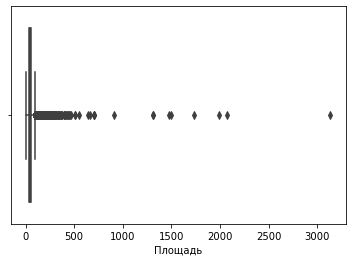

In [60]:
sns.boxplot(x=res_['Площадь']) # Распределение помещений по площади в исх массиве

<AxesSubplot:xlabel='Площадь'>

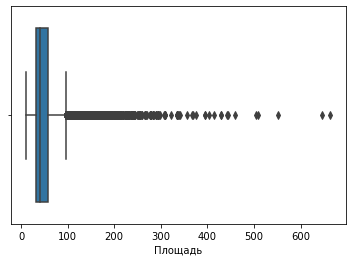

In [61]:
sns.boxplot(x=res['Площадь']) # После очистки

In [62]:
# Объекты с "подозрительно" большой площадью - в основном, помещения класса комфорт и выше
res.loc[res['Площадь'] >= 300]['класс'].value_counts()

премиум    17
де-люкс     8
бизнес      2
комфорт     2
эконом      1
Name: класс, dtype: int64

In [63]:
# Площадь помещения класса эконом соответствует его Описанию:
res['Описание помещения'][186357]

'квартира, номер этажа: 17, секция 1, номер объекта: 160, проектная (планируемая) площадь: 429,35 кв.м, местоположение: московская область, городской округ жуковский, в районе ул. нижегородская (около д. 33 и д. 33 корп. 3)'

In [64]:
# Условие отбора объектов с неизвестным кол-вом комнат:
filt4 = res['Кол-во комнат'].isnull()

In [65]:
# Объект с максимальной площадью из числа тех, для которых неизвестно кол-во комнат:
res[filt4].loc[res[filt4]['Площадь'] == res[filt4]['Площадь'].max()]

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Кол-во комнат,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Оценка цены 1 кв.м,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
16320,M,4264,Капитал Тауерс,Capital Towers,Пресненский,ЦАО,Москва,ЦАО,Capital Group,"квартира, номер этажа: 62, номер объекта: 297,...",290.70,NaN,NaN,NaN,62,297,квартира,корпус Б (City),NaN,1740048.00,77:01:0004042:1000-77/009/2019-445,2019-11-06,NaN,NaN,NaT,NaN,NaN,NaN,162174263.00,557875.00,2019-10-23,1,7,8546.00,m,премиум,4 кв 2021,верхние этажи,55.75,37.55,0,NaN,Есть,2017.11,"ЗПИФН ""Красная Пресня""",NaN,2) от СК до ~ТТК,7,нижние этажи,0.00,Нет,NaN,ПФ,Оценка по среднему,14,2019-11-06,0,77:01:0004042:1000,0


In [66]:
# Убеждаемся, что в описании нет информации о комнатности, это объект премиум-класса:
res['Описание помещения'][16320]

'квартира, номер этажа: 62, номер объекта: 297, проектная (планируемая) площадь: 290,69 кв.м, местоположение: г.москва, наб.краснопресненская, вл.14, строен.1'

In [67]:
# Таким образом остается массив из 1905 строк с неизвестным кол-вом комнат:
res[res['Кол-во комнат'].isnull()].shape[0] 

1905

In [68]:
# Из них в Описании помещения комнатность упоминается лишь в 3-ех помещениях (все апартаменты):
# with pd.option_context('display.max_colwidth', 250):
#     display(res.loc[(res['Кол-во комнат'].isnull()) & (res['Описание помещения'].str.contains('комнат'))]\
#             [['Описание помещения', 'Кол-во комнат']])

In [71]:
# Такие объекты имеются в составе 126 ЖК
res[res['Кол-во комнат'].isnull()].groupby('ID ЖК').count().shape[0] # >> 126
listRC = res[res['Кол-во комнат'].isnull()].groupby(['ID ЖК']).count()['Файл']\
    .sort_values(ascending=False).reset_index()\
    .rename(columns={'Файл': 'Кол-во'}) 
# listRC.head()

In [72]:
# Причем 37 ЖК представлены только одной записью:
listRC['Кол-во'].value_counts()[0:1]

1    37
Name: Кол-во, dtype: int64

In [76]:
# Варианты восстановления отсутствующих значений:
## По аналогам - объектам той же площади в тех же ЖК (могут отсутствовать):
# res.loc[(res['ID ЖК'] == '4653') & (res['Площадь'] == 82.8)]
res.loc[(res['ID ЖК'] == '4307') & (res['Площадь'] == 73.9)]
# res.loc[(res['ID ЖК'] == '1920') & (res['Площадь'] == 67.1)] # нет инф. о кол-ве комнат
# res.loc[(res['ID ЖК'] == '640') & (res['Площадь'] == 63.1)] # нет инф. о кол-ве комнат
# res.loc[(res['ID ЖК'] == '4307') & (res['Площадь'] == 79.2)] # нет инф. о кол-ве комнат
# res.loc[(res['ID ЖК'] == '4307') & (res['Площадь'] == 68.3)] # нет инф. о кол-ве комнат

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Кол-во комнат,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Оценка цены 1 кв.м,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
2994,M,4307,Крылья,Лобачевского 120,Раменки,ЗАО,Москва,ЗАО,Эталон (проекты Лидер Инвест),"квартира № 450, этаж №29, площадь:73.85 кв. м,...",73.90,NaN,NaN,NaN,29,450,квартира,корпус 1,NaN,1974683.00,77:07:0013002:4049-77/060/2020-311,2020-09-08,NaN,NaN,NaT,NaN,NaN,NaN,18463124.00,249839.30,2020-08-24,0,1,8506.00,f,бизнес,4 кв 2021,идёт отделка,55.70,37.47,0,NaN,Нет,2018.20,Эталон (проекты Лидер Инвест),NaN,3) от ~ТТК до МКАД,1,верхние этажи,0.00,Нет,NaN,ЗФ,Оценка по номеру,15,2020-09-08,1,77:07:0013002:4049,0
337806,M,4307,Крылья,Лобачевского 120,Раменки,ЗАО,Москва,ЗАО,Эталон (проекты Лидер Инвест),"1-комнатная квартира, номер этажа: 25, номер о...",73.90,1.00,NaN,1.00,25,421,квартира,корпус 1,NaN,1796704.00,77:07:0013002:4049-77/011/2020-1364,2020-02-04,300 месяцев,77:07:0013002:4049-77/011/2020-1365,NaT,ВОЗРОЖДЕНИЕ,300.00,ипотека,16127284.00,218231.18,2020-01-22,0,1,8506.00,f,бизнес,4 кв 2021,идёт отделка,55.70,37.47,1,NaN,Нет,2018.20,Эталон (проекты Лидер Инвест),NaN,3) от ~ТТК до МКАД,1,верхние этажи,0.00,Нет,NaN,ЗФ,Оценка по номеру,13,2020-02-04,0,77:07:0013002:4049,0


In [74]:
## По статистике распределения площадей для помещений разной комнатности по классам и типам помещений: 
distr_area = res[res['Кол-во комнат'].notnull()].groupby(['класс', 'Тип помещения', 'Кол-во комнат'])\
    .agg(['mean', 'std', 'min', 'max'])[['Площадь']].reset_index()
distr_area.loc[(distr_area['класс'] == 'комфорт') & (distr_area['Тип помещения'] == 'квартира')]

класс Тип помещения Кол-во комнат Площадь                   
                                           mean   std   min    max
24  комфорт      квартира          0.00   25.81  3.68 15.10  43.80
25  комфорт      квартира          1.00   38.03  5.57 19.80 116.60
26  комфорт      квартира          2.00   57.93  8.14 40.00 135.50
27  комфорт      квартира          3.00   79.75 12.66 50.10 176.00
28  комфорт      квартира          4.00  104.00 24.90 62.20 663.90

In [77]:
# На примере ЖК бизнес-класса, состоящего из 3-х корпусов:
res.loc[(res['ID ЖК'] == '4307') & res['Кол-во комнат'].isnull()]['Корпус'].value_counts()

корпус 2    109
корпус 1     91
корпус 3     34
Name: Корпус, dtype: int64

In [78]:
# Квартиры в разных корпусах различаются по площади, значения диапазонов (мин-макс) пересекаются для квартир разного типа
res.loc[(res['ID ЖК'] == '4307') & res['Кол-во комнат'].notnull()].groupby(['Корпус', 'Кол-во комнат'])\
    .agg(['mean', 'std', 'min', 'max'])[['Площадь']].reset_index()

Корпус Кол-во комнат Площадь                    
                              mean   std    min    max
0   корпус 1          1.00   49.77 17.77  32.40 124.50
1   корпус 1          2.00   75.66  7.02  69.10  82.50
2   корпус 1          3.00   89.99  4.32  86.60  96.70
3   корпус 1          4.00  106.40  0.19 106.20 106.60
4   корпус 2          1.00   52.15 15.33  35.40 108.00
5   корпус 2          2.00   71.52  5.72  60.80  80.60
6   корпус 2          3.00  101.88  6.84  93.50 108.30
7   корпус 3          0.00   36.30  0.00  36.30  36.30
8   корпус 3          1.00   51.25 10.42  41.40  83.60
9   корпус 3          2.00   63.60  1.56  62.50  64.70
10  корпус 3          3.00  101.55 10.63  86.40 110.90

In [79]:
## C исп. методов машинного обучения (KNN, MICE или др.)

#### Этаж

In [80]:
# Распределение помещений по этажам:
floor = res['Этаж'].value_counts().sort_index(ascending=True).reset_index()
floor = floor.rename({'index': '№ этажа', 'Этаж': 'Кол-во записей'}, axis=1)
floor.shape[0]

156

In [81]:
# Есть отрицательные и нулевые значения, а также очень большие:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(floor)
# -2 этаж - 2 записи
# -1 этаж - 1 запись
#  0 этаж - 257 записей 
# свыше 100 этажей - 70 записей
# в спецификации: "ниже уровня земли, этаж = 0 (написано текстом при регистрации) или -* (написано числом при регистрации)"
# вероятно, это ошибки
#  Размещение квартир и жилых комнат в подвальных и цокольных этажах жилых зданий не допускается 
# (СНиП 31-01-2003.Свод правил.Здания жилые многоквартирные)

,№ этажа,Кол-во записей
0,-2,2
1,-1,1
2,0,257
3,1,7835
4,2,20585
5,3,21823
6,4,22014
7,5,20496
8,6,19607
9,7,18673


In [82]:
res.query('Этаж < 0')[['Описание помещения','Этаж']] # в Описании помещения указаны именно отрицательные значения

,Описание помещения,Этаж
61948,"квартира, номер этажа: -2, номер объекта: 696,...",-2
130867,"квартира № 49, этаж №-1, блок б, площадь:10.26...",-1
197177,2-х секционный 17-ти этажный многоквартирный ж...,-2


In [83]:
# Удаляем строки с отрицательными этажами:
res = res.drop(res[res['Этаж'] < 0].index)

In [84]:
res.query('Этаж == 0') # Как правило, мансардные этажи, без указания номера (218 записей из 257) 

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Кол-во комнат,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Оценка цены 1 кв.м,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
1377,MO,1635,Театральный парк,NaN,Королев (г.),Ярославское шоссе,Московская область,Королев городской округ,Гранель,"квартира, номер этажа: мансардный, секция 4, н...",50.50,NaN,2,2.00,0,68,квартира,корпус 25,NaN,1748413.00,50:45:0010142:206-50/001/2019-265,2019-12-10,240 мес. с даты фактического предоставления кр...,50:45:0010142:206-50/001/2019-266,2019-12-10,СБЕРБАНК РОССИИ,240.00,ипотека,4238011.00,83921.01,2019-11-25,0,1,9713.00,f,эконом,4 кв 2020,сдан_ГК,55.93,37.89,1,4,Неизвестно,2019.70,Гранель,NaN,8) МО ср.,1,верхние этажи,0.00,Нет,NaN,ЗФ,Оценка по среднему,15,2019-12-10,0,50:45:0010142:206,0
3262,MO,1635,Театральный парк,NaN,Королев (г.),Ярославское шоссе,Московская область,Королев городской округ,Гранель,"2 - комнатная квартира, номер этажа: мансарда,...",52.10,2.00,2,2.00,0,29,квартира,корпус 42,NaN,2002337.00,50:45:0010150:37-50/215/2020-812,2020-10-02,86 месяцев,50:45:0010150:37-50/215/2020-811,2020-10-02,АЛЬФА-БАНК,86.00,ипотека,4831077.00,92727.01,2020-09-16,1,1,10318.00,f,эконом,1 кв 2021,сдан_ГК,55.93,37.89,1,2,Неизвестно,2020.30,NaN,NaN,8) МО ср.,1,идёт отделка,0.00,Нет,NaN,НФ,Оценка по среднему,16,2020-10-02,1,50:45:0010150:37,0
3504,SPB,4592,Образцовый квартал 5,NaN,поселок Шушары,Пушкинский район (СПб),Санкт-Петербург,Пушкинский район (СПб),Центр Развития,"однокомнатная квартира, номер этажа: мансарда,...",60.00,1.00,NaN,1.00,0,80,квартира,корпус 5,NaN,1698068.00,78:42:1850206:672-78/006/2019-95,2019-08-06,NaN,NaN,NaT,NaN,NaN,NaN,6021780.00,100363.00,2019-06-30,0,1,22558.00,f,комфорт,2 кв 2021,идёт отделка,59.76,30.36,0,NaN,NaN,2019.40,Центр Развития,NaN,3) СПБ - КАД+,1,NaN,0.00,Нет,NaN,ЗФ,Оценка по среднему,37,2019-08-06,0,78:42:1850206:672,0
4022,SPB,4535,Наутилус,Nautilus,муниципальный округ Южно-Приморский,Красносельский район (СПб),Санкт-Петербург,Красносельский район (СПб),КВС,"однокомнатная квартира, номер этажа: мансардны...",26.80,1.00,ст,0.00,0,189с,квартира,корпус 3,NaN,1809490.00,78:40:0008339:93-78/035/2020-833,2020-01-15,с 15.01.2020 на 228 месяцев,78:40:0008339:93-78/035/2020-834,2020-01-15,ОТКРЫТИЕ,228.00,ипотека,3854644.00,143830.00,2019-12-23,0,2,22507.00,m,бизнес,4 кв 2020,сдан_ГК,59.86,30.15,1,8,NaN,2018.80,КВС,NaN,2) СПБ - КАД,1,NaN,0.00,Нет,NaN,ЗФ,Оценка по среднему,23,2020-01-15,0,78:40:0008339:93,0
4299,SPB,4705,Образцовый квартал 6,NaN,поселок Шушары,Пушкинский район (СПб),Санкт-Петербург,Пушкинский район (СПб),Центр Развития,"трехкомнатная квартира, номер этажа: мансарда,...",91.10,3.00,3,3.00,0,21,квартира,корпус 9,NaN,607670.00,78:42:1850206:671-78/006/2019-45,2019-05-21,NaN,NaN,NaT,NaN,NaN,NaN,8910764.00,97813.00,2019-04-25,0,5,22752.00,m,комфорт,4 кв 2020,сдан_ГК,59.75,30.36,0,NaN,NaN,2019.12,Центр Развития,NaN,3) СПБ - КАД+,5,NaN,8517000.00,Есть,NaN,ЗФ,Оценка по среднему,26,2019-05-21,0,78:42:1850206:671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359085,MO,1082,Рублевское предместье,NaN,Глухово (дер.),Новорижское шоссе,Московская область,Красногорск городской округ,Новая Усадьба,"квартира, номер этажа: чердак, номер объекта: ...",19.40,NaN,ст,0.00,0,4,квартира,корп

In [85]:
# Это объекты в 40 ЖК:
res.loc[(res['Этаж'] == 0)]['ID ЖК'].value_counts().count()
# Располагая данными о ЖК, можно восстановить этаж для мансардных объектов (или ввести отдельный код)

40

In [92]:
# Объекты, в описании которых используются указанные слова:
with pd.option_context('display.max_colwidth', 250):
    display(res.loc[(res['Описание помещения'].str.contains('мансард') & (res['Этаж'] == 0))\
           | (res['Описание помещения'].str.contains('чердак') & (res['Этаж'] == 0))]\
            [['Описание помещения', 'Этаж']])

,Описание помещения,Этаж
1377,"квартира, номер этажа: мансардный, секция 4, номер объекта: 68, проектная (планируемая) площадь: 50,5 кв.м, местоположение: московская область, г.королев, мкр-н болшево, ул.полевая, д.9",0
3262,"2 - комнатная квартира, номер этажа: мансарда, секция 2, номер объекта: 29, проектная (планируемая) площадь: 52,1 кв.м, местоположение: московская область, г.королев, мкр-н болшево, ул.полевая, д.42",0
3504,"однокомнатная квартира, номер этажа: мансарда, номер объекта: 80, проектная (планируемая) площадь: 59,98 кв.м, местоположение: санкт-петербург, пушкинский район, пос.шушары, пулковское, уч.569, уч.4, 4 этап строительства 1 квартала, жилой дом №5,...",0
4022,"однокомнатная квартира, номер этажа: мансардный, номер объекта: 189с, проектная (планируемая) площадь: 26,79 кв.м, местоположение: санкт-петербург, красносельский район, петергофское шоссе, уч.12, (севернее пересечения с улицей пограничника гарьк...",0
4299,"трехкомнатная квартира, номер этажа: мансарда, номер объекта: 21, проектная (планируемая) площадь: 91,09 кв.м, местоположение: санкт-петербург, пушкинский район, поселок шушары, пулковское, участок 569, (участок 5), жилой дом 9, подъезд 1",0
...,...,...
359085,"квартира, номер этажа: чердак, номер объекта: 4, проектная (планируемая) площадь: 19,35 кв.м, местоположение: московская область, красногорский район, вблизи д.глухово, ул.рублевское предместье, корп.47",0
360684,"двухкомнатная квартира, номер этажа: мансарда, номер объекта: 50, проектная (планируемая) площадь: 91,49 кв.м, местоположение: санкт-петербург, пушкинский район, пос.шушары, пулковское, уч.569, уч.4, 4 этап строительства 1 квартала, жилой дом №5,...",0
361218,"квартира № 26-54, этаж №мансардный, площадь:76.9 кв. м, московская область , дмитровский г.о , с.озерецкое , корпус: корпус не указан,",0
361384,"санкт-петербург, красносельский район, петергофское шоссе, уч.12, (севернее пересечения с улицей пограничника гарькавого, квартал 39-3), корпус 1, секция 2-комнатная квартира, строительные оси б-м/12-17 на мансардный этаже №219, площадью 53.76 кв...",0


In [93]:
# Они значатся в 10 ЖК:
filt5 = ((res['Описание помещения'].str.contains('мансард')\
   | res['Описание помещения'].str.contains('чердак'))\
   & (res['Этаж'] == 0))
res.loc[filt5]['ID ЖК'].value_counts().count()

10

In [94]:
# Выведем список этих ЖК и их корпусов, сохраним в Excel:
mansardRC = res.loc[filt5].groupby(['ID ЖК', 'ЖК рус', 'Корпус']).count()[['Площадь']].reset_index().\
    rename(columns={'Площадь': 'Кол-во квартир'})
mansardRC.to_excel('mansardRC.xlsx') 

In [95]:
# Дополненный информацией о кол-ве этажей в корпусах ЖК:
# mansardRC_plus = pd.read_excel('mansardRC_plus.xlsx', usecols = 'B:G')
# mansardRC_plus.head()

In [96]:
# Используем полученную информацию для восстановления отсутствующих значений:
res.loc[((filt5) & (res['ID ЖК'] == '1082')), 'Этаж'] = 7
# res.loc[(filt5) & (res['ID ЖК'] == '1082')]

In [97]:
res.loc[((filt5) & ((res['ID ЖК'] == '1635') | (res['ID ЖК'] == '1894') | (res['ID ЖК'] == '4203'))), 'Этаж'] = 4
# res.loc[(filt5) & ((res['ID ЖК'] == '1635') | (res['ID ЖК'] == '1894') | (res['ID ЖК'] == '4203'))]

In [98]:
res.loc[((filt5) & ((res['ID ЖК'] == '1510') | (res['ID ЖК'] == '2311') | (res['ID ЖК'] == '4380')\
                    | (res['ID ЖК'] == '4535') | (res['ID ЖК'] == '4592') | (res['ID ЖК'] == '4705'))), 'Этаж'] = 5

In [100]:
# Остается 36 записей
res.loc[res['Этаж'] == 0].shape[0] # >> 36

# with pd.option_context('display.max_colwidth', 250):
#     display(res.loc[res['Этаж'] == 0])

36

In [101]:
# Удалим их ():
res = res.drop(res[res['Этаж'] == 0].index)

In [102]:
# В распределении по этажам присутствуют очень большие значения кол-ва этажей.
# Этажность домов определяется градостроительными нормативами по конкретному земельному участку, но может пересматриваться,
# поэтому обратимся к открытым данным, чтобы получить представление о существующих проектах максимальной высотности.
# По данным Единого ресурса застройщиков (ЕРЗ, erzrf.ru), самыми высокими домами с жилыми единицами в 2020 г. были:
#  Санкт-Петербург - 30 этажей
#  Ленинградская обл. - 28 этажей
#  Москва - 79 этажей
#  Московская обл. - 41 этаж 

In [103]:
# Условие для отбора объектов, находящихся на более высоких этажах:
filt6 = ((res['Регион'] == 'Москва') & (res['Этаж'] >= 79))\
        | ((res['Регион'] == 'Московская область') & (res['Этаж'] >= 41))\
        | ((res['Регион'] == 'Новая Москва') & (res['Этаж'] >= 41))\
        | ((res['Регион'] == 'Санкт-Петербург') & (res['Этаж'] >= 30))\
        | ((res['Регион'] == 'Ленинградская область') & (res['Этаж'] >= 28))

In [104]:
# Таковых - 119
res.loc[filt6].shape[0] # >> 119

119

In [105]:
# Они сосредоточены в 99 ЖК:
res.loc[filt6].groupby(['Регион', 'ID ЖК', 'ЖК рус', 'Корпус'])['Этаж'].max().reset_index().head()

,Регион,ID ЖК,ЖК рус,Корпус,Этаж
0,Ленинградская область,2673,Ветер перемен,корпус 10,92
1,Ленинградская область,2673,Ветер перемен,корпус 9,239
2,Ленинградская область,3151,Материк,корпус Д-Ж,1324
3,Ленинградская область,3289,Новое Горелово,корпус 31,153
4,Ленинградская область,3289,Новое Горелово,корпус 53,35


In [106]:
# Пример таких помещений в ЖК Ветер перемен
res.loc[(res['ID ЖК'] == '2673') & (res['Этаж'] >= 28)] # >> этажи 92 и 239

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Кол-во комнат,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Оценка цены 1 кв.м,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
2743,SPB,2673,Ветер перемен,NaN,Новогорелово (п.),Ломоносовский район (Спб),Ленинградская область,Ломоносовский район (ЛО),Газпромбанк Инвест,"квартира, номер этажа: 92, секция 1, оси 4-6/а...",26.50,NaN,ст,0.00,92,92,квартира,корпус 10,NaN,1352403.00,47:14:0603001:4863-47/012/2020-10,2020-02-13,NaN,NaN,NaT,NaN,NaN,NaN,1986520.00,74963.02,2020-01-16,0,1,22894.00,f,комфорт,1 кв 2021,верхние этажи,59.79,30.17,0,1,NaN,2020.30,Газпромбанк Инвест,NaN,4) СПБ - ЛО,1,NaN,0.00,Нет,NaN,ЗФ,Оценка по среднему,28,2020-02-13,0,47:14:0603001:4863,0
84015,SPB,2673,Ветер перемен,NaN,Новогорелово (п.),Ломоносовский район (Спб),Ленинградская область,Ломоносовский район (ЛО),Газпромбанк Инвест,"квартира № секция 2 оси: 19-21/в-ж, этаж №239,...",23.70,NaN,ст,0.00,239,4,квартира,корпус 9,NaN,2049497.00,47:14:0603001:4877-47/168/2020-70,2020-11-11,NaN,NaN,NaT,NaN,NaN,NaN,1905243.00,80390.00,2020-09-21,0,1,22895.00,f,комфорт,1 кв 2021,идёт отделка,59.79,30.17,0,2,NaN,2020.20,Газпромбанк Инвест,NaN,4) СПБ - ЛО,1,NaN,0.00,Нет,NaN,ЗФ,Оценка по среднему,51,2020-11-11,1,47:14:0603001:4877,0


In [107]:
# В Описании помещений - ошибочные сведения, на самом деле оба корпуса - 17-ти этажные (novostroy-spb.ru/baza/jk_veter_peremen)
res['Описание помещения'][84015]

'квартира № секция 2 оси: 19-21/в-ж, этаж №239, площадь:23.73 кв. м, ленинградская область, ломоносовский район, мо "виллозское сельское поселение", пос.новогорелово, уч.9, корпус: корпус не указан,'

In [108]:
# Для таких объектов можно восстановить только кол-во этажей в здании, но не этаж самого помещения
# Удаляем такие строки
res = res.drop(res[filt6].index)

In [109]:
res.shape[0]

293944

<AxesSubplot:xlabel='Этаж'>

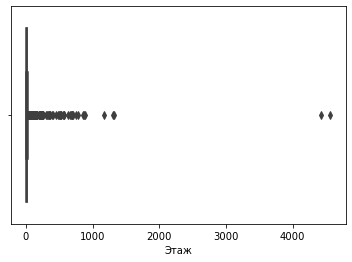

In [110]:
sns.boxplot(x=res_['Этаж'])

<AxesSubplot:xlabel='Этаж'>

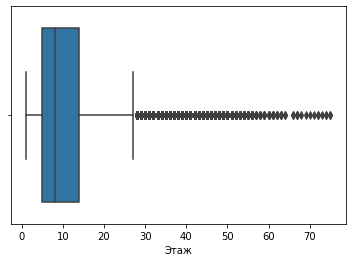

In [111]:
sns.boxplot(x=res['Этаж'])

In [112]:
# Кол-во помещений в высотных домах: 
res.query('Этаж >= 30').shape[0]

2976

In [113]:
# Кол-во ЖК с такой высотностью: 
tallRC = res.loc[res['Этаж'] >= 30].groupby(['Регион', 'ID ЖК', 'ЖК рус'])['Этаж'].max().reset_index().sort_values('Этаж', ascending=False)
tallRC.head()

,Регион,ID ЖК,ЖК рус,Этаж
25,Москва,4348,Спайрс,75
7,Москва,1920,Нева Тауерс,75
34,Москва,4514,Метрополия,74
8,Москва,2038,Хэдлайнер,69
60,Москва,603,Мельникова 1-3,68


In [114]:
tallRC['Регион'].value_counts()

Москва                62
Московская область    14
Новая Москва           2
Name: Регион, dtype: int64

#### Корпус ЖК

In [115]:
# Объекты с неизвестным корпусом:
# По 348 ЖК (5988 записей) отсутствуют названия корпусов:
res[res['Корпус'].isnull()].groupby('ID ЖК').count().shape[0]
# res[res['Корпус'].isnull()].shape[0] # >> 5988 записей

348

In [116]:
# Оставляем значения по корпусам как есть, для целей анализа больший интерес представляет очередь строительства
# По ней, к сожалению, данных нет, а номер (или наименование) корпуса никак с ней не связан.

#### Оценка стоимости

In [148]:
# Объекты с неизвестной стоимостью:
res[res['Оценка цены'].isnull()].head()

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Кол-во комнат,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Оценка цены 1 кв.м,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
268,SPB,4965,Сириус (Гатчина),NaN,Гатчина (г.),Гатчинский район (ЛО),Ленинградская область,Гатчинский район (ЛО),Инвестстрой Корпорация,"квартира, номер этажа: 8, секция 2, оси: ас-лс...",85.90,NaN,4,4.00,8,89,квартира,корпус 1,NaN,1890909.00,47:25:0101009:24-47/012/2019-82,2019-04-26,240 месяцев с даты фактического предоставления...,47:25:0101009:24-47/012/2019-83,2019-04-26,СОВКОМБАНК,240.00,ипотека,NaN,NaN,2019-03-21,0,1,22995.00,m,эконом,2 кв 2021,идёт отделка,59.58,30.13,1,2,NaN,2019.70,Инвестстрой Корпорация,NaN,4) СПБ - ЛО,1,NaN,0.00,Нет,NaN,ЗФ,Без оценки,36,2019-04-26,0,47:25:0101009:24,0
486,SPB,4965,Сириус (Гатчина),NaN,Гатчина (г.),Гатчинский район (ЛО),Ленинградская область,Гатчинский район (ЛО),Инвестстрой Корпорация,"квартира, номер этажа: 6, секция 6, оси: ас-гс...",40.60,NaN,1,1.00,6,80,квартира,корпус 1,NaN,151978.00,47:25:0101009:24-47/012/2020-392,2020-08-20,240 месяцев,47:25:0101009:24-47/012/2020-393,2020-08-20,СБЕРБАНК РОССИИ,240.00,ипотека,NaN,NaN,2020-08-12,1,1,22995.00,f,эконом,2 кв 2021,идёт отделка,59.58,30.13,1,6,NaN,2019.70,"ООО ""КАПСТРОЙ""",NaN,4) СПБ - ЛО,1,NaN,0.00,Нет,NaN,ЮФ,Без оценки,8,2020-08-20,0,47:25:0101009:24,0
1684,M,4632,Пироговская Малая 14,NaN,Хамовники,ЦАО,Москва,ЦАО,Elbert Development,"апартамент, номер этажа: 4, номер объекта: ап ...",68.40,NaN,NaN,NaN,4,Ап 22,апартамент,корпус 1,"ЗАО ""Штрабаг""",NaN,77:01:0005008:1006-77/011/2019-45,2019-05-15,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2019-03-27,0,38,9414.00,NaN,премиум,1 кв 2022,идёт отделка,55.73,37.57,0,NaN,Есть,2019.10,Elbert Development,NaN,2) от СК до ~ТТК,38,котлован,0.00,Нет,NaN,ЗЮ,Без оценки,49,2019-05-15,0,77:01:0005008:1006,1
1862,MO,4446,Дом на Тверской,NaN,Дубна (г.),Дмитровское шоссе,Московская область,Дубна городской округ,Бетиз,"2 - комнатная квартира, номер этажа: 5, номер ...",61.00,2.00,2,2.00,5,119,квартира,корпус 30/32,NaN,1676811.00,50:40:0010302:21-50/001/2019-143,2019-09-20,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2019-08-20,0,1,8884.00,m,эконом,2 кв 2022,Заморожен,56.76,37.13,0,NaN,Нет,2015.20,Бетиз,NaN,9) МО дальн.,1,Заморожен,0.00,Нет,NaN,ЗФ,Без оценки,31,2019-09-20,0,50:40:010302:20,0
2053,MO,1584,Город счастья,NaN,Домодедово (г.),Каширское шоссе,Московская область,Домодедово городской округ,Атлант,"2 - комнатная квартира, номер этажа: 15, номер...",54.90,2.00,2,2.00,15,84в,квартира,корпус 3,NaN,1949102.00,50:28:0060212:200-50/215/2020-1065,2020-08-12,на 240 месяцев,50:28:0060212:200-50/215/2020-1063,2020-08-12,ТРАНСКАПИТАЛБАНК,240.00,ипотека,NaN,NaN,2020-07-17,1,1,5936.00,m,эконом,1 кв 2021,сдан_ГК,55.39,37.78,1,NaN,Нет,2015.20,"ООО ""Проектно-строительная генподрядная компан...",NaN,8) МО ср.,1,идёт отделка,0.00,Нет,NaN,ЮФ,Без оценки,26,2020-08-12,1,50:28:0060212:200,0


In [117]:
# Кол-во таких записей:
res[res['Оценка цены'].isnull()].shape[0] # >> 972

972

In [118]:
# Среди них есть ЖК, в которых доступны данные по квартирам той же площади, а есть - с полным отсутствием стоимости
# Объекты с доступной стоимостью:
wprices = res.loc[~(res['Тип оценки'] == 'Без оценки')]

In [119]:
# По ним можно посчитать средние. Например, так:
average_prices = wprices.groupby(['Регион', 'класс', 'Тип помещения'])\
    .agg(['mean', 'min', 'max'])['Оценка цены 1 кв.м'].reset_index()

In [120]:
# Разброс цен внутри класса может быть значительным:
average_prices.loc[(average_prices['Регион'] == 'Москва') & (average_prices['Тип помещения'] == 'квартира')]
# average_prices.loc[(average_prices['Регион'] == 'Москва') & (average_prices['класс'] == 'премиум') & (average_prices['Тип помещения'] == 'апартамент')]
# average_prices.loc[(average_prices['Регион'] == 'Москва') & (average_prices['класс'] == 'эконом') & (average_prices['Тип помещения'] == 'квартира')]

,Регион,класс,Тип помещения,mean,min,max
5,Москва,бизнес,квартира,247505.23,94600.00,721848.00
7,Москва,де-люкс,квартира,1001332.89,416949.29,2044615.00
9,Москва,комфорт,квартира,191859.95,91573.00,395600.00
11,Москва,премиум,квартира,587180.46,240400.00,1800000.00
13,Москва,эконом,квартира,139709.28,91332.99,247801.00
15,Москва,эконом (панель),квартира,162695.40,90505.62,335399.00


In [121]:
#  Кол-во строк без пропусков по ключевым полям (исходный массив - 295020 записей):
res.loc[((res['Кол-во комнат'].notnull()) & (res['Этаж'].notnull()) \
         & (res['Оценка цены'].notnull()))].shape[0] # 291083 (98,7%)

291083

In [122]:
# Оставляем по указанным полям записи без пропусков. 
sel = res.loc[((res['Кол-во комнат'].notnull()) & (res['Этаж'].notnull()) & (res['Оценка цены'].notnull()))]

In [123]:
# Обновляем значение оценки цены 1 кв. м площади:
sel = sel.copy()
sel['Оценка цены 1 кв.м'] = sel['Оценка цены'] / sel['Площадь']

In [126]:
# check_missing_value(sel)

#### Тип покупателя

In [127]:
# Распределение по типу покупателей:
sel['is_buyer_ul'].value_counts(dropna=False)
# 0 - покупатель явл. ФЛ, 1 - ЮЛ 

0    260306
1     30777
Name: is_buyer_ul, dtype: int64

In [128]:
# В то же время, для 138 записей заполнены оба поля покупателей
sel.loc[sel['is_buyer_ul'] == 1]['Покупатель ФЛ'].isnull().value_counts(dropna=False)
# sel.loc[res['is_buyer_ul'] == 1]['Покупатель ФЛ'].isnull().sum()

True     30639
False      138
Name: Покупатель ФЛ, dtype: int64

In [129]:
# Вот эти записи:
sel.loc[(sel['is_buyer_ul'] == 1) & (sel['Покупатель ФЛ'].notnull())].head()
# Условились, что считаем значения в поле типа покупателей (is_buyer_ul) верными.

,Файл,ID ЖК,ЖК рус,ЖК англ,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Описание помещения,Площадь,Комнатность,Тип Комнатности,Кол-во комнат,Этаж,Номер,Тип помещения,Корпус,Покупатель ЮЛ,Покупатель ФЛ,Номер регистрации,Дата регистрации,Условия обременения,Номер обременения,Дата обременения,Залогодержатель,Длительность обременения,Тип обременения,Оценка цены,Оценка цены 1 кв.м,Дата ДДУ,Уступка,Купил лотов в ЖК,ID Корпус,Пол,класс,Срок сдачи,Стадия строительства,lat,lng,Ипотека,Секция,Отделка,Старт продаж К,Продавец ЮЛ,Продавец ФЛ ID,Зона,Купил кв и ап в ЖК,Стадия строительства в дату ДДУ,Цена ДДУ,Цена ДДУ Есть/Нет,Цена со скидкой,Тип сделки,Тип оценки,Разница,Дата регистрации модель,version,участок,is_buyer_ul
792,MO,1142,Лукино-Варино,NaN,Свердловский (п.),Щелковское шоссе,Московская область,Лосино-Петровский городской округ,СУ-22,"квартира № 198, этаж №9, секция 1, площадь:40....",40.70,NaN,2,2.00,9,198,квартира,корпус 23,"ООО ""ВЕК-Недвижимость""",2105641.00,50:14:0030503:1006-50/215/2020-130,2020-12-17,NaN,NaN,NaT,NaN,NaN,NaN,2625150.00,64500.00,2020-11-30,1,59,10576.00,m,эконом,2 кв 2022,идёт отделка,55.90,38.15,0,1,Нет,2020.70,"ООО ""ВЕК-Недвижимость""",NaN,9) МО дальн.,59,верхние этажи,0.00,Нет,NaN,ЮФ,Оценка по номеру,17,2020-12-17,1,50:14:0030503:1006,1
2244,MO,1142,Лукино-Варино,NaN,Свердловский (п.),Щелковское шоссе,Московская область,Лосино-Петровский городской округ,СУ-22,"квартира № 1164, этаж №16, секция 1, площадь:7...",79.60,NaN,4,4.00,16,1164,квартира,корпус 23,"ООО ""НЕ ЛИШНИЕ МЕТРЫ""",583524.00,50:14:0030503:1006-50/215/2020-125,2020-12-15,NaN,NaN,NaT,NaN,NaN,NaN,4855600.00,61000.00,2020-11-27,1,40,10576.00,f,эконом,2 кв 2022,идёт отделка,55.90,38.15,0,1,Нет,2020.70,"ООО ""НЕ ЛИШНИЕ МЕТРЫ""",NaN,9) МО дальн.,40,верхние этажи,0.00,Нет,NaN,ЮФ,Оценка по номеру,18,2020-12-15,1,50:14:0030503:1006,1
3081,MO,2092,Кирова 17 (Домодедово),NaN,Домодедово (г.),Каширское шоссе,Московская область,Домодедово городской округ,Гюнай,"1 - комнатная квартира, номер этажа: 14, секци...",44.10,1.00,1,1.00,14,446,квартира,корпус 1,"ЗАО ""Алстрой""",1985692.00,50:28:0010577:2-50/215/2020-3106,2020-09-14,NaN,50:28:0010577:2-50/215/2020-3104,2020-09-14,ТРАНСКАПИТАЛБАНК,NaN,ипотека,2608118.00,59141.00,2020-08-21,1,107,8135.00,f,эконом,2 кв 2022,идёт отделка,55.43,37.75,1,5,Нет,2015.50,NaN,NaN,8) МО ср.,106,идёт отделка,0.00,Нет,NaN,НФ,Оценка по среднему,24,2020-09-14,1,50:28:0010577:2,1
7265,MO,1346,Лидер Парк,NaN,Мытищи (г.),Ярославское шоссе,Московская область,Мытищи городской округ,Атлант,"квартира, номер этажа: 1, секция 6, номер объе...",37.00,NaN,1,1.00,1,886д,квартира,корпус 5 (Д),"ООО ""Спецстрой""",1997139.00,50:12:0101003:1923-50/215/2020-2482,2020-10-02,на 120 мес.,50:12:0101003:1923-50/215/2020-2486,2020-10-08,СЕВЕРГАЗБАНК,120.00,ипотека,3100637.00,83801.00,2020-06-17,1,1663,7473.00,m,эконом,2 кв 2021,идёт отделка,55.93,37.74,1,6,Нет,2016.80,NaN,NaN,7) МО ближ.,853,идёт отделка,0.00,Нет,NaN,НФ,Оценка по среднему,107,2020-10-02,1,50:12:0101003:1923,1
12057,M,1860,Лучи,NaN,Солнцево,ЗАО,Москва,ЗАО,ЛСР,"квартира № 376, этаж №7, площадь:56.74 кв. м, ...",56.70,NaN,2,2.00,7,376,квартира,корпус 8,"ЗАО ""ЛСР. Недвижимость-М""",1918049.00,77:07:0015007:5441-77/060/2020-7,2020-07-17,NaN,NaN,NaT,NaN,NaN,NaN,10837296.00,191133.97,2020-06-22,1,11,8672.00,m,эконом (панель),2 кв 2022,идёт отделка,55.64,37.39,0,NaN,Неизвестно,2019.10,NaN,NaN,4) Москва за МКАД,6,нижние этажи,0.00,Нет,NaN,НФ,Оценка по номеру,25,2020-07-17,1,77:07:0015007:5441,1


In [130]:
# Сохраняем полученный массив в файл:
sel.to_csv('sel.csv', index = False) # header = True по умолчанию